# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

In [2]:
mpl.rcParams['legend.handlelength'] = 1.8

In [3]:
# mpl.rcParams['savefig.dpi'] = 600
# pdf_fig_size=(3.2, 2.2)
pdf_fig_size=(3.5, 2.5)

## 1.2 Read Data

In [4]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path= 'D:/data/NCDC/altdorf/dat.txt' 
# file_path= 'D:/data/NCDC/san_fran_bay_reserve/dat.txt'
# file_path= 'D:/data/NCDC/veracurz_harbor/dat.txt', # Dir problem
# file_path= 'D:/data/NCDC/senj/dat.txt', # Bad dir, may be update in recent years?
# file_path= 'D:/data/NCDC/leninogorsk/dat.txt', # Bad dir

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis_MN/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
file_path, bandwidth = 'data/ECMWF/usa/48.75N98.25W/dat.csv', 0.8# Olga, good accordance; might have overfitting problem in 4
# file_path, bandwidth= 'data/ECMWF/venezuela/8N67W/dat.csv', 0.3 # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.1 # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path, bandwidth= 'data/ECMWF/sudan/18N32E/dat.csv', 0.5 # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/ECMWF/china/20N120E/dat.csv', 2, 1.1 # China East Sea
# file_path, NUMBER_OF_GAUSSIAN, bandiwdth = 'data/ECMWF/australia/37S142E/dat.csv', 5, 0.5

# file_path= 'd:/data/ECMWF/28.5N16.5W/dat.csv' # Tenerife

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# US offshore
# file_path = 'D:/data/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/data/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/data/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/data/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [5]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [6]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df.head()

time        lat     lon         x         y     speed  \
0 1979-01-01 00:00:00  48.750004  261.75 -6.007003 -1.468434  6.183881   
1 1979-01-01 06:00:00  48.750004  261.75 -5.749926 -0.236968  5.754807   
2 1979-01-01 12:00:00  48.750004  261.75 -4.950674 -0.303665  4.959978   
3 1979-01-01 18:00:00  48.750004  261.75 -5.490054  1.950379  5.826206   
4 1979-01-02 00:00:00  48.750004  261.75 -3.863687  3.476271  5.197358   

          dir      date  HrMn     type wind_type  
0  193.736770  19790101  0000  default   default  
1  182.359959  19790101  0600  default   default  
2  183.510019  19790101  1200  default   default  
3  160.442068  19790101  1800  default   default  
4  138.021369  19790102  0000  default   default

In [7]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [8]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


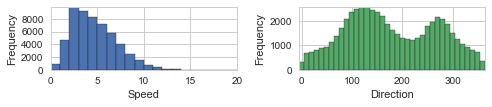

In [9]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat       lon             x             y         speed  \
count  5.552000e+04  55520.00  55520.000000  55520.000000  55520.000000   
mean   4.875000e+01    261.75     -1.023136      0.403814      4.729708   
std    3.152707e-11      0.00      3.186055      4.093201      2.396789   
min    4.875000e+01    261.75    -17.779930    -14.095932      0.065852   
25%    4.875000e+01    261.75     -2.997665     -2.488354      2.839346   
50%    4.875000e+01    261.75     -0.967118      0.583280      4.370591   
75%    4.875000e+01    261.75      1.197744      3.251902      6.225724   
max    4.875000e+01    261.75     11.594738     18.637878     19.479633   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     178.830542  1.997567e+07    900.000000    209.142080  
std       89.791404  1.096640e+05    670.826435    105.171154  
min        0.003026  1.979010e+07      0.000000      0.012248  
25%      108.565887  1.988070e+07    450.000000    138.823232  
50%      165.845953  1.997567e+07    900.000000    217.278887  
75%      259.333867  2.007070e+07   1350.000000    303.251672  
max      359.991104  2.016123e+07   1800.000000    359.997332

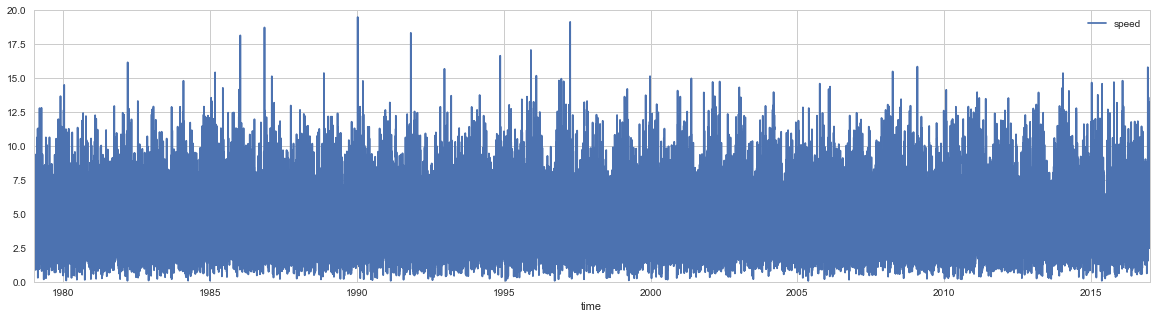

In [10]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [11]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR, N_VM_PHI = 5, 2
else:
    N_VM_DIR, N_VM_PHI = 4, 3

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


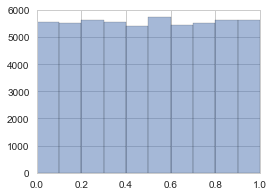

In [12]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [13]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

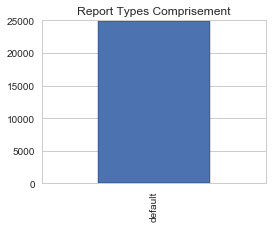

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

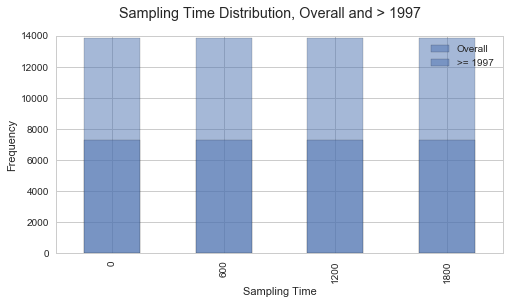

In [15]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [16]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [17]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

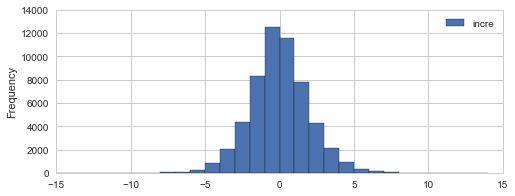

In [18]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [19]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')
print('sudden decrease number', len(df.query('(incre < -@incre_threshold )&(incre_reverse < -@incre_threshold )')))
df = df.query('(incre > -@incre_threshold )|(incre_reverse > -@incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0
sudden decrease number 0


lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [20]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if 'SECTOR_LENGTH' not in globals():
    if integer_data:
        SECTOR_LENGTH = 360/len(effective_column) 
    else: 
        SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.003026      1
0.024999      1
0.043512      1
0.095594      1
0.101178      1
0.152644      1
0.159109      1
0.164975      1
0.174803      1
0.184286      1
0.184784      1
0.189856      1
0.194780      1
0.197551      1
0.202469      1
0.226156      1
0.239702      1
0.242288      1
0.257882      1
0.258034      1
0.266782      1
0.275204      1
0.284157      1
0.301771      1
0.312160      1
0.313661      1
0.335668      1
0.339468      1
0.345943      1
0.422797      1
             ..
359.648288    1
359.692081    1
359.704991    1
359.709218    1
359.713566    1
359.726712    1
359.742328    1
359.750869    1
359.764612    1
359.779436    1
359.781165    1
359.804539    1
359.811885    1
359.815428    1
359.823268    1
359.827777    1
359.834705    1
359.842399    1
359.849495    1
359.850159    1
359.858650    1
359.874073    1
359.881292    1
359.899789    1
359.964413    1
359.969737    1
359.976378    1
359.981613    1
359.984731    1
359.991104    1
Name: dir, Length: 55520

0 10


In [21]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0155144877937


Series([], Name: speed, dtype: int64)


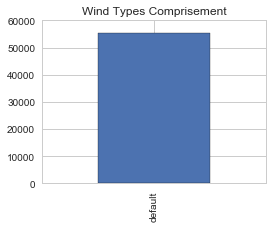

In [23]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [24]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


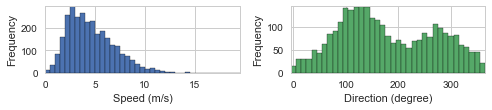

1981 - 1985


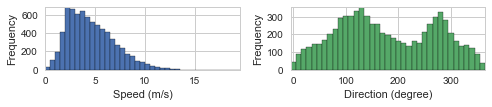

1986 - 1990


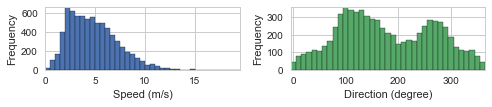

1991 - 1995


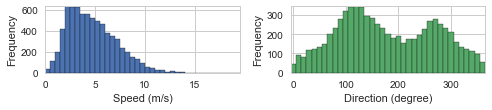

1996 - 2000


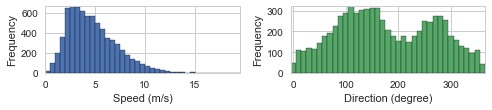

2001 - 2005


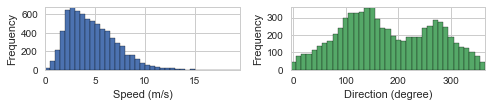

2006 - 2010


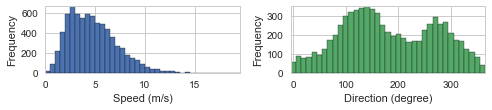

2011 - 2015


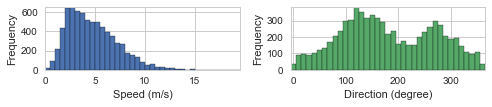

2016 - 2016


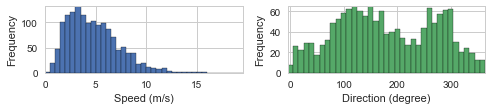

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 7.0)

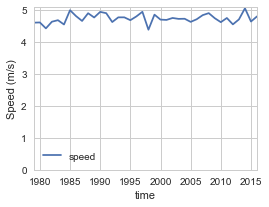

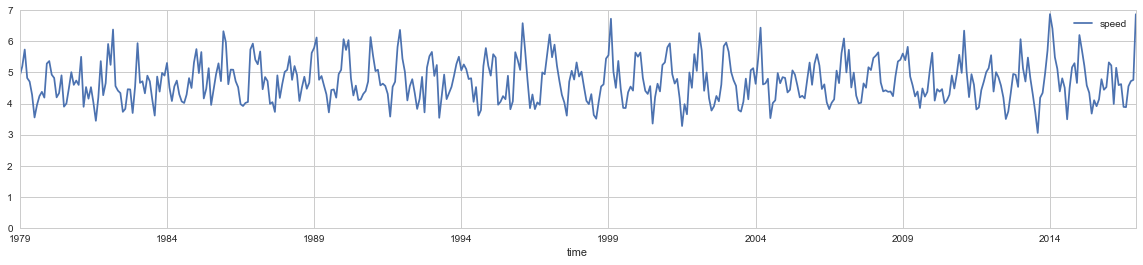

In [26]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
plt_configure(ylabel="Speed"+speed_unit_text)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares, years = [], []
    for year in arange(1980, 2016):
        sub_df = df[str(year-1):str(year+1)]
        if len(sub_df) > 1000:
            current_density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            R_square = sector_r_square(density_all, current_density)
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUwAAADECAYAAAD0+hheAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6lJREFUeJzt3X9Q0/f9B/DnJ0AQk6Clnbvdl9IBJXc6j5Ufo+15Yv2u
Lb3NVms1NnG4ndqv5Xo6uBWDCqKHU7mVdMMrq2z0tgsFxrRbN/er0zm4Q8p1n862ooxbvo47tbWI
tSYRgg3v7x898jVNTD5APiHg83HXu/p+vwOvzyfhSfL5vN9vJCGEABERhaWZ7gKIiGYKBiYRkUIM
TCIihRiYREQKMTCJiBRiYBIRKRSvZNDTTz8NvV4PAEhNTcXzzz+PiooKSJKErKwsVFdXQ6PRoL29
HW1tbYiPj0dJSQmWL1+OkZERlJeXY2hoCDqdDrW1tUhJSVH1oIiIVCHCGBkZEStXrvRr27Jli3j7
7beFEEJUVVWJt956S3z88cdixYoVwuPxiOvXr/v+/7XXXhP19fVCCCGOHTsmampqwn1LIqKYFPYj
eV9fH4aHh7Fx40Zs2LABp0+fRm9vLwoKCgAAhYWFOHXqFN5//33k5ORAq9XCYDAgLS0NfX19kGUZ
S5cu9Y3t7u5W9zcAEZFKwn4knzNnDjZt2oS1a9fiP//5D5577jkIISBJEgBAp9PB6XTC5XLBYDD4
HqfT6eByufzax8eGI8vyZI+HiCikvLy8ST82bGCmp6fjvvvugyRJSE9Px/z589Hb2+vrd7vdSE5O
hl6vh9vt9ms3GAx+7eNjlZjKQUVKf38/thw8Dv1d/xXQ5/rkIg5XPAqj0RiVWmRZjolzArCW22Et
wcVaLVMR9iP5kSNHcPDgQQDA5cuX4XK5sGTJEvT09AAAOjs7kZ+fj+zsbMiyDI/HA6fTCYfDAaPR
iNzcXHR0dPjGxsqJG+f1etHf3x/0v/Pnz093eUQUQ8K+w1yzZg127NgBs9kMSZKwf/9+3HXXXaiq
qoLNZkNGRgaKiooQFxeH4uJiWCwWCCFQVlaGxMREmM1mWK1WmM1mJCQkoK6uLhrHpZjD4UDxjhbM
nbcgoG/owjncnbpwGqoiolgUNjC1Wm3QkGtubg5oM5lMMJlMfm1JSUmor6+fQonqmztvQdCP3Tc+
vTwN1RBRrOLEdSIihRiYREQKMTCJiBRiYBIRKcTAJCJSSNHmGxRIjI2FnKeZmZmJuLi4KFZERGpj
YE7SsHMQuxuvYO48R0DfjU8/hv2AJWqrgIgoOhiYU3C7+ZtENDvxGiYRkUIMTCIihfiRXAW8IUQ0
OzEwVcAbQkSzEwNTJbwhRDT78BomEZFCDEwiIoUYmERECjEwiYgUYmASESnEwCQiUojTiqIs1KR2
Tmgnim0MzCi73aR2Tmgnin0MzGnASe1EMxOvYRIRKcR3mDEi3IYdXq83itUQUTAMzBgRbsMO6/ps
FBQUTENlRDROUWAODQ1h9erVeO211xAfH4+KigpIkoSsrCxUV1dDo9Ggvb0dbW1tiI+PR0lJCZYv
X46RkRGUl5djaGgIOp0OtbW1SElJUfuYZixe2ySKbWGvYd68eRO7d+/GnDlzAAAHDhxAaWkpWlpa
IITAiRMnMDg4CLvdjra2NjQ1NcFms2F0dBStra0wGo1oaWnBqlWr0NDQoPoBERGpJew7zNraWjz7
7LNobGwEAPT29vo+GhYWFqKrqwsajQY5OTnQarXQarVIS0tDX18fZFnG5s2bfWMnEpiyLE/meCZs
YGAgKt8nEqJ1TpRgLcGxluBiqZapCBmYb7zxBlJSUrB06VJfYAohIEkSAECn08HpdMLlcsFgMPge
p9Pp4HK5/NrHxyqVl5c34YOZDIPBABz7KCrfa6qidU7CkWWZtQTBWoKLtVqmImRgHj16FJIkobu7
G+fOnYPVasXVq1d9/W63G8nJydDr9XC73X7tBoPBr318LBHRTBXyGubrr7+O5uZm2O12LFy4ELW1
tSgsLERPTw8AoLOzE/n5+cjOzoYsy/B4PHA6nXA4HDAajcjNzUVHR4dvbKz8liEimowJTyuyWq2o
qqqCzWZDRkYGioqKEBcXh+LiYlgsFgghUFZWhsTERJjNZlitVpjNZiQkJKCurk6NYyAiigrFgWm3
233/39zcHNBvMplgMpn82pKSklBfXz+F8oiIYgeXRhIRKcTAJCJSiEsjZwAxNoZLly6hv78/aD/3
0SSKDgbmDDDsHIT9pISj7x4P6OM+mkTRw8CcIbjOnGj68RomEZFCDEwiIoUYmERECjEwiYgUYmAS
ESnEu+QzXLi/BcQ5mkSRw8Cc4cL9LSDO0SSKHAbmLMA5mkTRwWuYREQKMTCJiBRiYBIRKcTAJCJS
iIFJRKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFLojlkZ6vV44HIFrrQGE3LhipuPGHESRFTYw
vV4vKisrcf78eUiShL179yIxMREVFRWQJAlZWVmorq6GRqNBe3s72traEB8fj5KSEixfvhwjIyMo
Ly/H0NAQdDodamtrkZKSEo1j83E4HCje0YK58xYE9A1dOIe7UxdGtZ5o4cYcRJEVNjBPnjwJAGhr
a0NPTw9efvllCCFQWlqKBx98ELt378aJEyfwwAMPwG634+jRo/B4PLBYLFiyZAlaW1thNBqxdetW
/OEPf0BDQwMqKytVP7Avut0GFTc+vRz1WqKJG3MQRU7YwHz00UfxyCOPAAAuXbqE5ORknDp1CgUF
BQCAwsJCdHV1QaPRICcnB1qtFlqtFmlpaejr64Msy9i8ebNvbENDg3pHQ0SkIkXXMOPj42G1WvHX
v/4V9fX16OrqgiRJAACdTgen0wmXywWDweB7jE6ng8vl8msfH6uELMsTPZbbGhgYiNjXmk3OnDmj
+Pn4okg+P1PFWoJjLZGn+KZPbW0tXnzxRZhMJng8Hl+72+1GcnIy9Ho93G63X7vBYPBrHx+rRF5e
ntLSwjIYDMCxjyL29WaLxYsXT+oapizLEX1+poK1BMdagptqcIedVvTb3/4Whw8fBgAkJSVBkiQs
XrwYPT09AIDOzk7k5+cjOzsbsizD4/HA6XTC4XDAaDQiNzcXHR0dvrGxcuKIiCYq7DvMxx9/HDt2
7MD69evx2WefYefOncjMzERVVRVsNhsyMjJQVFSEuLg4FBcXw2KxQAiBsrIyJCYmwmw2w2q1wmw2
IyEhAXV1ddE4LiKiiAsbmHPnzsVPfvKTgPbm5uaANpPJBJPJ5NeWlJSE+vr6KZRIRBQbuNKHiEgh
BiYRkUIMTCIihRiYREQKMTCJiBRiYBIRKXRHbO9Ggbj1G9HEMTDvUNz6jWjiGJh3MG79RjQxvIZJ
RKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFGJgEhEpxMAkIlKIgUlEpBADk4hIIQYmEZFCXEtO
AcLtZOT1eqNYDVHsYGBSgHA7GVnXZ6OgoGAaKiOaXgxMCoo7GREF4jVMIiKFGJhERAqF/Eh+8+ZN
7Ny5ExcvXsTo6ChKSkpw//33o6KiApIkISsrC9XV1dBoNGhvb0dbWxvi4+NRUlKC5cuXY2RkBOXl
5RgaGoJOp0NtbS1SUlKidWxERBEV8h3m7373O8yfPx8tLS34+c9/jpqaGhw4cAClpaVoaWmBEAIn
TpzA4OAg7HY72tra0NTUBJvNhtHRUbS2tsJoNKKlpQWrVq1CQ0NDtI6LiCjiQr7DfOKJJ1BUVAQA
EEIgLi4Ovb29vjukhYWF6OrqgkajQU5ODrRaLbRaLdLS0tDX1wdZlrF582bfWAYmEc1kIQNTp9MB
AFwuF7Zt24bS0lLU1tZCkiRfv9PphMvlgsFg8Hucy+Xyax8fq5QsyxM+mNsZGBiI2Neiz0Xy+Zkq
1hIca4m8sNO

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGEhJREFUeJzt3X1MFHf+B/D3PrAUdxctP9PE/DgULBurm408xObCHS1J
FWPqaS+6uV2DSYEGuJ4e9MRFBNFAbInC3WGkT/H+WZTtRi49c+ZSK+lBgpY/5q4SsJy5DUeieC3S
B3e2sgjM74/+2DvKAsO6j/B+JSb6nVnnM1/Y9+7Md74zCkmSJBAR0YKUkS6AiCgWMCyJiGRgWBIR
ycCwJCKSgWFJRCQDw5KISAb1YitMTU2hpqYGQ0NDUCgUOHXqFOLj41FVVQWFQoH09HTU1dVBqVTC
6XTC4XBArVajrKwMeXl5GB8fR2VlJcbGxqDVatHY2IikpKRw7BsRUdAs+s3yk08+AQA4HA6Ul5fj
t7/9Ld58802Ul5fj0qVLkCQJnZ2dGB0dhd1uh8PhwIULF9Dc3IyJiQm0t7fDYDDg0qVL2Lt3L1pb
W0O+U0REwbboN8uXXnoJL774IgBgZGQEiYmJuHHjBrZt2wYAyM3NRU9PD5RKJTIyMqDRaKDRaJCS
koLBwUEIgoDi4mLfugxLIopFi4YlAKjVathsNnz88cdoaWlBT08PFAoFAECr1cLtdkMURej1et9r
tFotRFGc1T6z7mIEQQhkX4iIFpWVlRXQ62SFJQA0NjbiyJEjMJvN8Hq9vnaPx4PExETodDp4PJ5Z
7Xq9flb7zLpyBLpDwSYIQlTUEi11AKxlPqzFv2irJVCLnrP88MMP8e677wIAEhISoFAoYDQa0dvb
CwDo7u5GdnY2TCYTBEGA1+uF2+2Gy+WCwWBAZmYmurq6fOtGS6cRES3Fot8sd+zYgWPHjuHAgQOY
nJxEdXU1Nm7ciNraWjQ3NyMtLQ35+flQqVQoKCiA1WqFJEmoqKhAfHw8LBYLbDYbLBYL4uLi0NTU
FI79IiIKqkXDctWqVfj9738/p72trW1Om9lshtlsntWWkJCAlpaWJyiRiCjyeFE6EZEMDEsiIhkY
lkREMjAsiYhkYFgSEcnAsCQikoFhSUQkA8OSiEgGhiURkQwMSyIiGRiWREQyMCyJiGRgWBIRycCw
JCKSgWFJRCQDw5KISAaGJRGRDLIfWEaxZ2pqCi6Xa97lGzduhEqlCmNFRLGLYbmMuVwuFBy7hFWr
n5mz7Ltvv4T9TSsMBkMEKiOKPQuG5ePHj1FdXY179+5hYmICZWVlWLduHUpKSrBhwwYAgMViwa5d
u+B0OuFwOKBWq1FWVoa8vDyMj4+jsrISY2Nj0Gq1aGxsRFJSUjj2i/7fqtXPQPf0/0a6DKKYt2BY
XrlyBWvWrMGZM2fwzTffYO/evXj99dfx6quvorCw0Lfe6Ogo7HY7Ojo64PV6YbVakZOTg/b2dhgM
Bhw6dAhXr15Fa2srampqQr5TK8lCh9pDQ0NhroZo+VowLHfu3In8/HwAgCRJUKlU6O/vx9DQEDo7
O7F+/XpUV1ejr68PGRkZ0Gg00Gg0SElJweDgIARBQHFxMQAgNzcXra2tod+jFWahQ+2xu5/jf5Kf
i0BVRMvPgmGp1WoBAKIo4vDhwygvL8fExAT2798Po9GIt99+G+fPn8emTZug1+tnvU4URYii6GvX
arVwu92yCxMEIZD9CYloqcVfHcPDw/Mean/37Rfz/l/S9DSuXbuG/v5+v8uTk5MXHPyJlj4BWMt8
WEtwLTrAc//+fbz++uuwWq3YvXs3Hj58iMTERADA9u3bUV9fj+zsbHg8Ht9rPB4P9Ho9dDqdr93j
8fheJ0dWVtZS9yUkBEGIeC1TU1P405/+BKPROGfZzAfaUj1yj8L+iQKrVs+9euz7wR/jvIM/0dAn
M1iLf6zFvycJ7QXD8sGDBygsLMSJEyfw4x//GABQVFSE2tpamEwm3Lx5E1u2bIHJZMLvfvc7eL1e
TExMwOVywWAwIDMzE11dXTCZTOju7o6aDos1LpcLjRf7sGr1v+cse5JDbQ7+EMm3YFi+8847ePjw
IVpbW33nG6uqqnD69GnExcVh7dq1qK+vh06nQ0FBAaxWKyRJQkVFBeLj42GxWGCz2WCxWBAXF4em
pqaw7NRyFMihdqCk6ekFB4empqaCvk2iaLdgWNbU1PgdvXY4HHPazGYzzGbzrLaEhAS0tLQ8YYkU
bo/cozjx3gOsWj13lP27b7+E7YAJ27Zti0BlRJHDi9LJLx6iE83GueFERDIwLImIZGBYEhHJwLAk
IpKBAzy0JNL0NEZGRnDnzh2/y3nbN1quGJa0JDMzfzr+dn3OMt72jZYzhiUtGS8ropWI5yyJiGTg
N8sowftSEkU3hmWU4H0piaIbwzKKhPNmGRQd+FC52MGwJIogPlQudjAsiSKMVxfEBo6GExHJwLAk
IpKBYUlEJAPDkohIBoYlEZEMHA2noFnsQWcr9ZpBzs5aHhYMy8ePH6O6uhr37t3DxMQEysrK8Oyz
z6KqqgoKhQLp6emoq6uDUqmE0+mEw+GAWq1GWVkZ8vLyMD4+jsrKSoyNjUGr1aKxsRFJSUnh2jcK
s8UedLZSrxnk7KzlYcGwvHLlCtasWYMzZ87gm2++wd69e7Fp0yaUl5fj+eefx4kTJ9DZ2YmtW7fC
brejo6MDXq8XVqsVOTk5aG9vh8FgwKFDh3D16lW0trb6fVokLR+8ZtA/zs6KfQuG5c6dO5Gfnw8A
kCQJKpUKAwMDvseg5ubmoqenB0qlEhkZGdBoNNBoNEhJScHg4CAEQUBxcbFv3Zlnj8shCEKg+xR0
4ahleHg45NuItP7+frjd7qD/v9H+uxLoz1aansa1a9fQ39/vd3lycvKCpzWivV9izYJhqdVqAQCi
KOLw4cMoLy9HY2MjFAqFb7nb7YYoitDr9bNeJ4rirPaZdeXKyspa8s6EgiAIYalFr9cDf/53yLcT
SUajMeiH4eH6+cgxXy2B/mxnbrS8avXccdjvT2vM35+x0C+R8CShveho+P3793Hw4EHs2bMHu3fv
hlL5n5d4PB4kJiZCp9PB4/HMatfr9bPaZ9YlIvlmDt9/+Mff+U8KrQXD8sGDBygsLERlZSX27dsH
ANi8eTN6e3sBAN3d3cjOzobJZIIgCPB6vXC73XC5XDAYDMjMzERXV5dv3Wj5dCEiWqoFD8Pfeecd
PHz4EK2trb7zjcePH0dDQwOam5uRlpaG/Px8qFQqFBQUwGq1QpIkVFRUID4+HhaLBTabDRaLBXFx
cWhqagrLThERBduCYVlTU+N39LqtrW1Om9lshtlsntWWkJCAlpaWJyyRiCjyeFE6URBMTU1heHh4
1kDnDF54vjwwLMNsvtkcfEPFNpfLhcaLfVi1eu6oNy88Xx4YlmE232wOvqFiHy88X94YlhHg703F
NxRRdONdh4iIZGBYEhHJwLAkIpKBYUlEJAPDkohIBo6GU1jwLurBtVh/Tk1NhbGalYFhSWHBu6gH
12L9aTtg8t13loKDYUlhw7uoBxf7M7x4zpKISAaGJRGRDAxLIiIZeM6SSCY+/3tlY1gSycTnf69s
DEuKuFi6BpO3YVu5GJYUcbwGk2KBrLC8desWzp49C7vdjtu3b6OkpAQbNmwAAFgsFuzatQtOpxMO
hwNqtRplZWXIy8vD+Pg4KisrMTY2Bq1Wi8bGRiQlJYVyf6ICz20tHa8ZpGi3aFi+//77uHLlChIS
EgAAAwMDePXVV1FYWOhbZ3R0FHa7HR0dHfB6vbBarcjJyUF7ezsMBgMOHTqEq1evorW11e8D0JYb
ntsiWn4WDcuUlBScO3cOR48eBQD09/djaGgInZ2dWL9+Paqrq9HX14eMjAxoNBpoNBqkpKRgcHAQ
giCguLgYAJC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)
    
if 'portus' in file_path:
    df = randomize_angle(df, DIR_REDISTRIBUTE, 1)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [31]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
# print('Speed redistribution info:', speed_redistribution_info )

print('Data Size: ', len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Data Size:  55520


In [32]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

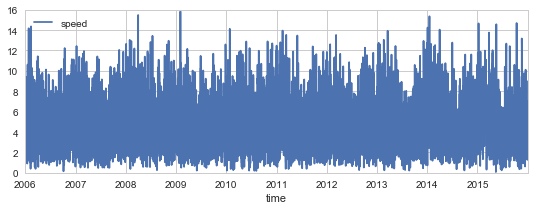

In [33]:
df.plot(y='speed',legend=True, figsize=(9,3))

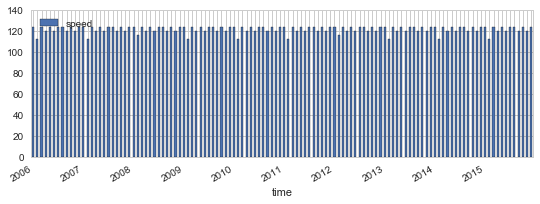

In [34]:
# Accumulation by month
df_ts = df.resample('M').count()
ax = df_ts.plot(y='speed', kind='bar',figsize=(9,3))

import matplotlib.ticker as ticker
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_ts.index)
ticklabels[::12] = [item.strftime('%Y') for item in df_ts.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

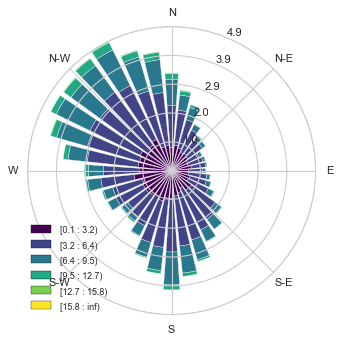

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()
plt_configure(figsize=(4.5,4.5))

In [36]:
# Examination for large datasets
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
small_fig_size = (3.5,2.5)

In [38]:
# 2. CDF comparison
print('test') # papermill may have bugs on this
x, y_weibull, _, y_cdf_weibull,  weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=small_fig_size, xlabel='V',ylabel='PDF', legend=True)

fig = plt.figure()
df['dir'].hist(bins=arange(0, 360, 10), alpha=0.5, label='Data', normed=True)    
plt_configure(xlabel = "Direction", ylabel='Density', legend=True, figsize=small_fig_size)
align_figures()

test


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAC3CAYAAAA7KkOPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/HXMDChDKsLZm6IW24BIqigFkp6Sb0aIpCi
qeXWcjW30KsSmtpVuy6Zec3K680iqX6Ba5IL92p6ASNFAw2FMgsIRJkB2WZ+f3iZHIURYYYDM9/n
48FD5pw5Z97ngR/O4ZzvItNqtVoEQTBrVlIHEATB9EShC4IFEIUuCBZAFLogWABR6IJgAUShC4IF
sDbVjjUaDVFRUWRkZKBQKFi1ahUdO3bUrd+3bx+7du1CLpfTrVs3oqKiAAxuIwhC3ZjsjJ6QkEBZ
WRkxMTHMnz+ftWvX6tbdvn2bjRs38s9//pNPP/0UlUrFsWPHDG4jCELdmazQU1JSGDx4MAAeHh6k
paXp1ikUCj799FOaNWsGQEVFBY888ojBbQRBqDuTXbqrVCqUSqXutVwup6KiAmtra6ysrGjZsiUA
u3fvpri4GD8/Pw4ePFjjNjVJSUkx1SEIQpPTr1+/apebrNCVSiVqtVr3WqPR6BWsRqNh3bp1XL16
lS1btiCTyR64TU1qOjhzlZKSIo7ZAjzsMRs66Zns0t3Ly4vExEQAUlNT6datm9765cuXU1payrvv
vqu7hH/QNoIg1I3JzuiBgYGcPHmSsLAwtFotq1evJj4+nuLiYnr37k1sbCze3t5MmTIFgMmTJ1e7
jSAI9WeyQreysiI6Olpvmbu7u+779PT0are7dxtBEOpPNJgRBAsgCl0QLIAodEGwAKLQBcECiEIX
BAsgCl0QHmDKlCmcO3cOgLKyMvr168f777+vWx8REcEPP/xw33aJiYnExMRw7do1JkyYUOvP8/Pz
A2DlypVkZmbWM/0dJnu8JgimtHDhQvbu3WuUfYWEhLBu3boa1/v5+ZGcnEzfvn1JSUnB39+fEydO
8MILL1BaWsovv/xCjx497ttuyJAhAFy7ds0oOetDnNHrQKPRkJ+fX+2XRqOROp5gZIMGDSI5ORmA
EydOEBISQlFREUVFRXz33Xf4+PiQlJREeHg4kyZNIjIykvLycr744gvWr18PQEFBAbNmzSIkJISt
W7cC8Prrr+tagiYmJvL666+b7BjEGb0Obty4wa64ZOyUDnrL1apbTBnjTYsWLSRKZjnWrVtn8Cxs
TD179uTKlStotVqSkpJ47bXXGDhwIKdOnSIjIwN/f3+WLVvGnj17aNGiBRs3buTLL7/U66dRXFzM
unXraN68ORMnTmTYsGENkr2KKPQ6slM6YO/gLHUMoQFYWVnRo0cPEhMTadWqFQqFgiFDhnD8+HHS
09OZOHEiy5YtY+7cucCd8RYGDRqkN2hKjx49sLe3B6BPnz5cvXpV7zNMPb2CuHQXhFrw8/Nj+/bt
uvES+vXrx8WLF9FoNDg7O9OmTRveffdddu/ezaxZsxgwYIDe9pmZmajVaioqKjh37hxdu3ZFoVCQ
l5cHwMWLF02aXxS6INTCoEGDSElJYejQocCdwVPs7e3x8fHBysqKpUuXMmPGDMLCwtizZ899PS8d
HR2ZN28eYWFhjBgxgi5duhASEsJHH33E888/T05Ojknzy5r6lExS9FPOz88n9uil+y7di27dYHxA
N5P/jS76ZluGuvRHr+n94owuCBZAFLogWABx190AjUbDjRs37lteUFBA0/6DR7A0otANqOl5ee5v
17B3bIGDo3i8JjQNotAfoLrn5aqimxKlEarUdLVVF87OzlhZmfdfsaLQJVReXk5aWhpJSUlcunSJ
kJAQfH19pY7VJNR0tfWwLKU1oyh0I9JoNBQUFNS4Ljc3l5SUFJKSkkhOTiY1NZXbt2/r3rN582a2
b9/O1KlTGypyk9aQrRPPnDnD3Llz6dKlC1qtloqKCiZPnkxQUFC1779+/Trp6ekEBAQ0SL4HEYVu
RMXqIvYe+Z0WrVoDUFKs5uu4f5GZcZ7szHRKbxfr3mttbU2fPn3o378//fv3R6lUMmfOHKZNm0Za
Whp/+9vfkMvlUh2KUI0BAwbw97//HQC1Wk1ERARubm48/vjj97339OnTXLlyRRS6uWqutMfewRmt
VsuH70RzJvEQMpkM17YdGervi7+/P97e3nh4eGBra6u3rbe3N6NHj+btt9/mhx9+4JNPPsHR0VGi
IxEMsbOzIzQ0lAMHDvCvf/2L3377jdzcXAICAnj11Vf5xz/+we3bt/H09MTe3p533nkHrVaLWq1m
w4YNuLm5NWheUegmcvJoPGcSD9GtpxcLV26nsrL8ga3munTpwunTpwkLC+PgwYMMHDiQuLg4unTp
0oDJhdpq0aIFX3/9NSNHjiQkJITS0lKGDBnCvHnzmDFjBleuXGHYsGF8/PHHrFu3DldXV9577z0O
HTrE7NmzGzSrKHQTyMv5hY+2rsS2WXNmL3qL5nZKim7V7g6xo6Mj+/btY/HixWzYsAFfX19iY2N5
6qmnTJxaeFjXr1/H09OT8+fPc/r0aZRKJWVlZfe9z9XVlTfffJPmzZuTk5ODl5dXg2cVhW5kGk0l
O95eQkmxihmvvUnrNu3+t7zmG3X3Pt6Ry+WsX7+eXr16MXPmTJ5++mm2bNnCrFmzGuQYmgq16pZk
+1CpVOzdu5fx48dTUlJCdHQ02dnZfPbZZ2i1WqysrHSDkCxbtowjR46gVCpZvHixybukVkcUupEd
O7iX9PPJeA8azpDAcbrl996oq2Lo8c7UqVPp2rUrzz77LLNnzyYtLU13M8jSOTs7M2WMt9H2VRun
T58mIiICKysrKisreeWVV3Bzc2P+/PmkpqaiUCjo2LEjubm5dOvWjW3bttGrVy/GjBnDxIkTadas
GS1btiQ3N9couR+GyQpdo9EQFRVFRkYGCoWCVatW6XXEBygpKWHq1Km8+eabuumaxo0bp5s6uV27
dqxZs8ZUEY3ul58yOfj5hzg5t+SFv0Qjk8n01lfdqHsY/v7+/Pe//2XMmDFs3bqV9PR0lixZYszY
TZKVlVWDPvv29fXl22+/rXZdXFzcfctcXV05fPgwAM8884xJs9WGyQo9ISGBsrIyYmJiSE1NZe3a
tWzbtk23/vz586xYsUKvH25paSlarZbdu3ebKpbJlJWVsmfHOiorK5gxfzX2tWweW5tL+k6dOnHq
1CkmTZrEV199RV5eHmfPnhWP34RaM1m7v5SUFN1oHB4eHqSlpemtLysrY+vWrXTu3Fm3LD09nZKS
EqZNm8bkyZNJTU01VTyji/nwbXKuZ+M/7M884T241tvduaS/SOzRS3pfu+KS9Zp4KpVKvvjiC8aP
H8+5c+fYvHmzKQ5DMFMmO6OrVCrdJTjcucFUUVGhGzCvug7ytra2TJ8+nZCQELKysnjxxRc5dOiQ
3iB71TE0AXx9FBYW8ttvtyhSlegtz8vNRS5XUFF55/WlC8kc+vKfuLR6lAFPjeP69ev37evebe5d
rmim/xlqVTGpqak4OTnpLZ85cybffPMNkZGRuLm50b59+/ofaBNhqp9zY2asYzZZoSuVStRqte61
RqN5YMG6ubnRsWNHZDIZbm5uODk5kZeXx6OPPmpwO1ONPJKfn8+PBfePJCPTliG3VtDatS2qokJi
P9qAXG7N5NlLeKx9e1q7tr1vX3dvU5vlNwsfoUOH1ri4uOgt79SpEwsWLGDp0qX8/e9/59ixY2bf
IQPECDO1fX9NTFboXl5eHDt2jKCgIFJTU+8bQ6s6sbGxXLp0iaioKHJyclCpVLRq1cpUEetNq9Xy
wZY3uJGfy4Tn59Kuo/Eathi6S+/j48O4ceP48ssvee+995gzZ47RPlcwTyY7FQQGBqJQKAgLC2PN
mjVERkYSHx9

In [39]:
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=small_fig_size)

fig = plt.figure()
plot(x, y_ecdf,'-', label='ECDF', color='black')
plot(x, y_cdf_weibull,'--',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=small_fig_size)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPUAAAC0CAYAAABMtWqsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGftJREFUeJzt3XtAVHX+//HnDDMgAgLihUzAvIvlFwXNu6lrqVtbKxqI
UX7d7Neuvy1ts9TVdn/qqmn9dLUfVrbdLFdz+2Zo9vWnoOJqoiKGd/ECMkKKAioiMDDz/QMdQYZx
GOYCZ96Pv5yZM+d8TvbynHmfz0VlNBqNCCEUQ+3qBggh7EtCLYTCSKiFUBgJtRAKI6EWQmEk1EIo
jMbVDXiQtLQ0VzdBiEYjMjLygds0+lCDdSdiL2lpaU49njMp+dzAPc7PGnL7LYTCSKiFUBgJtRAK
I6EWQmEk1EIojIRaCIWRUAuhME3iOXVDpKTr2JiUycXLNwlt68eEkV0Y2ru9TftKTU1l+vTpdO7c
2fReYGAgK1euZMOGDSQmJqJWq9Hr9cyYMYPHH3+cVatWsWXLFtq0aUNlZSXNmjXjzTffJDw83Oz+
nn76aWJiYhp83sJ9KTrUKek6ln1174F9Vt4N02tbg92/f3+WL19e470ffviBvXv38vnnn6PVasnJ
yeGFF17gu+++A2Dy5MlMnDgRgHPnzjFt2jS+//77OvcnREMo+vZ7Y1Jmvd631fr163n11VfRarUA
hISEsGnTJlq2bFlr206dOtGzZ0/p/urG8m5eoaKywmH7V/SV+uLlm2bfz6njfWvs37+f+Ph40+th
w4Zx5coVQkJCamwXGBhY5z6CgoIoLCykVatWtfb3+eef4+HhYXP7RONj+gl47Sr+Xc5S6nORCT1/
zYRHn3bI8RQd6tC2fmTl3aj1fkhbP5v3ae52ed++feTl5eHnd2+/e/bsoVu3bmb3kZuby5NPPkll
ZaXcfitc1U/AQ3i01uH56GlKNRUYiv3xLungsGM69fZbr9czc+ZM4uLiGD9+PElJSQ493oSRXer1
vq2io6NJSEigoqLqlurChQvMnTvX7BU3MzOTs2fPEhERYdc2iMYlJV3HH9/byXvf7sKzRyqejxwH
oDwrnLIT/dmWku+wYzv1Sp2YmEhAQADLli2jqKiI5557jpEjRzrseHeLYRuTMsm5fJOQBla/ofbt
N8CaNWvIz88nLi4OrVZLZWUly5YtIygoCKi6pd66dStqtRqNRsPKlSvRaBR9k+TWUtJ1LFt3AE27
c3j1vIBKbaTiWjD6i91B3wxo2E/AB1E5c4rgW7duYTQa8fX1pbCw0KqrtbOH0yl5+J6Szw1ce37V
H51q/K+iCjmGutltDGXN0GeFY7jepsb2HR5qwao3h9frGNaen1NDfVdxcTG///3vef7553nmmWcs
bitVYtHYHc0q4dt9BaAtQxt6Ck1QHkajiopfOlBxqRMYat+VRQ9syWMdmtf7WI1ykoS8vDymTZtG
XFzcAwN9l1yp7UPJ5wauO7/Pdibj0foi2pAzqO4Uwsov9MR4u0WtbTs81MLmn4DWXuCcGuqrV68y
ZcoU3nnnHQYMGODMQwthdynpOv6ZcogrAal4+hVhrNBQntWDyiuhgKrW9jNfiGxQPcdaTg31hx9+
yI0bN0hISCAhIQGoKjI1a9bMmc0QosGS0i7wQcq/0ARfwMNMIQxAq1FjMBjtUqCtD6eGeu7cucyd
O9eZhxTC7o7kneCTU5+ibXcLQ1kzys0UwgCmx/Z2WpCrk+cqQljpx4OnWHf0vyjzycHooaIi7xGz
hbCG/G62B0X3/ba3l156iYyMDADKy8uJjIzkk08+MX0eHx/PyZMna30vJSWFDRs2oNPpeP75560+
3qBBg0z7PXfuXANbL2xlMBpI2JnIp2f+H2U+ORiK/Sk7NoCKnG5mA73qzeEuCzTIlbpeBg0axKFD
h+jVqxdpaWkMHjyY3bt38/LLL1NWVsalS5fo3r17re8NHToUAJ1O5+wmiwZISdexLuUgV30PoPYt
AjSUZ4VTeSUEc4UwsH9vRVs0+VCvPfIt+3MO22Vf/UP6EE6HOj8fOHAgCQkJTJkyhd27dzNhwgTe
e+89bt68yfHjx+nXrx8HDx5k+fLleHh4EBISwvz589m8eTPnz58nNjaWgoICXn31Va5du8YTTzzB
tGnTmDVrFmPHjmXo0KGkpKSwdetWlixZYpdzErapKoRtRBOchbqOQthdHmqV04thljT5UDtTeHg4
58+fx2g0cvDgQd544w0GDBjAvn37OH36NIMHD2bevHmsW7eOoKAgVqxYwXfffVejS2hJSQnLli2j
efPmTJo0yaHdZIX1qvcIaxtWzHX/NLTtSiwWwsC2nmGO1uRDHR8RTXxEtN32Z+kBv1qtpnv37qSk
pNC6dWs8PT0ZOnQou3bt4tSpU0yaNIl58+Yxffp0AEpLSxk4cCBhYWGmfXTv3t00muuxxx7jwoUL
NY7hgg5+bs80mYa2DO0jJykK+qWqR1gdhbDqGsPt9v2afKidbdCgQXz00Uf8+te/Bqp6u9195h4Y
GEhwcDAJCQn4+fmRlJRE8+bNycvLM33/3Llz3Lp1Cy8vLzIyMoiJieGnn34iP79q1M6JEyecf1Ju
7pukM1b3CHPVs+f6kFDX08CBA5k7dy5Lly4FwNPTEz8/P3r06IFarebPf/4zr7zyCkajER8fH5Yu
XVoj1P7+/syYMYOCggLGjh1L586dmTBhAnPmzGHz5s106NDBRWfmPqrfaj/UvpKrgQfw9L3bI8xy
IcxVz57rwyUDOupDRmnZj5LPDaw7P9OttroSTbuzaIKzzA6NBGgV4I2vt9Zuw3Ybytq/P7lSC7ey
MSkTtX8+2rATpqGR5Vk9MVxvXWvb/3w6vNFflc2RUAu3UXj7Ork+e/AKqRoaqa9WCFOpICy4RaO5
KjeEhFooWkq6jm+SznDJcALPkDN4tNTfKYQ9ivH2vTnlwoIb36MpW0mohWKlpOt479tdaDscR+tX
hKFCgz47nMr82oWwxvhoylYSaqFIZRXlfHroW7x6nq5VCGtsBTB7k1ALRUhJ1/HF1stcXZ9I27Bi
DO2OUtKiCGOZ950eYfcKYYU3Svls3pMubK1jSahFk2e2R1iZCs+iLtw43wEMNadqbsi8702BhFo0
eeZ7hD2Kr1cbMNyutb2Sfj+bI6EWTdrFokv8ErjdbI+wwrJSZr4Qadd535sCCbVoMqp37wwJ9qb9
Y3n8XJSK2tdgtkdYSFs/hvZur/gQ309CLZqE6ssSq/3z+aX1Ca4U3sZP488TbUfzzYHrtb6j9Nvs
ukioRZOwMSkTtKV3Jsv/BaNBhT73EbwNvYmPfoIwHx1fbsng6o0Kt7nNrouEWjR6BqMBneEYzR6r
KoRV3gxAn9UT420/dOqqQtjQ3u3xMVxW9IAVa0moRaN2segSHx36Gm3YhapC2IWaPcKU/njKFhJq
0aiYimH5RQR2vkhpizMYMNDFL5yMlLag96qxvbv+brbEqlAfOHCA5ORksrKyUKvVhIWFMXLkSKKi
ohzdPuFG7hbD1P75aHueoMTrNoZSb57t9Czxg4eR8pDO7R5P2cJiqE+ePMmiRYto2bIlUVFR9O3b
F41Gg06n48svv2T58uXMmTOHnj17Oqu9QsHW78xA2+lIjUJYRW5nDuQbiB+MWz6esoXFUCcmJrJy
5UoCAwNrfTZp0iSuXbvGxx9/bHWoDQYDf/3rXzl9+jSenp4sXLiwxqR8wj0ZjAZ2nNtDftsf0dxX
CAPHLtCuRBZD/fbbb1v8clBQELNnz7b6YDt27KC8vJwNGzZw5MgRlixZwurVq63+vlCeu4WwzGsX
UKu1lF2oPTRSimH1YzHUmZmZvPXWW2RlZdGnTx8WLFhAu3btbD5YWloaQ4YMASAiIoJjx47ZvC/R
9JjrEXakKBW

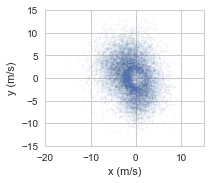

In [40]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=small_fig_size,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [41]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [42]:
%%time
direction_plot(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAB6CAYAAAD6WhzgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEI9JREFUeJzt3X1QVNX/B/D35UlIVFCUmgwT0RxMEEWIKSRH0YxISRoB
xd+ImVpNOo0jPvGQ+IA6OuM4iOJDEZkxKTiMWtMPG8VMMWhJESPBr1gpsDwssjwEsuf7B8P9urB7
2F32mc9rhhnu2XPvfu7ufvaee+7ZcwXGGAMhRCUbUwdAiDmjBCGEgxKEEA5KEEI4KEEI4aAEIYTD
YhOks7MT27dvR2BgIAIDA7F37150dXXprT4AyOVyhIeHQyaTqa2TmJiIV155Relv+/btauvfu3cP
S5cuha+vL8LCwlBQUND/zvZj5cqVfWI4ceKE2vpFRUWIiIiAj48PFi9ejNu3b4uP/fjjj9i8ebPO
sZw/fx7vvfeeUlnv2Hr+VD2PqvVNilmo1NRUFhoayiQSCbt27Rp7/fXXWVpamt7qM8ZYSkoKO3Lk
CLdOVFQUO3z4MKutrRX/mpubVdZta2tjs2bNYgkJCayiooKlpaWxqVOnsgcPHvS/wxzBwcEsNzdX
KYbW1laVdaurq5mfnx87ePAgq6ioYMnJySwwMJA1NTWJdRYvXswKCwu1juPnn39mvr6+LCIiQqn8
2bhqa2vZ2bNn2ZQpU9jt27c1Wt+ULDJB2tvbma+vL8vPzxfLcnJyWFBQEOvq6hpwfca639Rp06Yx
mUzGjSUgIIBduXJFo7hzc3NZUFAQ6+joEMuWLVvGUlNTNVpflebmZjZp0iRWUVGhUf1Dhw6xRYsW
icsKhYLNmTOHZWVlKcW5bNkyreJITU1lU6ZMYe+88w73A97S0sKCg4NZenq6Tusbm0U2se7evYu2
tjYEBASIZf7+/qivr8fDhw8HXB8AsrOz4efnhxEjRqiNQyqVQiaTYfz48RrF/dtvv8HPzw/29vZi
2cyZMyGRSDRaX5WKigrY2dnBw8NDo/oSiQQzZ84UlwVBwIwZM5RimD17NiQSCcrLyzWO48aNG8jM
zMS8efO49b744gvY29sjLi5Op/WNzSITpKamBk5OThg2bJhYNnr0aABAdXX1gOsDwOXLlxEcHMyN
o6KiAoIg4NixYwgJCcHbb7+NkydPQqFQqKxfW1uLMWPGKJW5ubmhpqaG+zz9xeDs7IxNmzbhjTfe
wMKFC5Gbm6u2viYxjBgxAlOnTsWVK1c0jiM3NxczZszg1mlvb0dmZiZWr14NBwcHrdc3BYtMkLa2
NgwZMkSprOcF7+joGHD9rq4ulJWVwcvLixvH/fv3YWNjAw8PD2RkZCAuLg5paWk4fvy4VnGrikFT
lZWVaG9vR1BQEI4fP45FixYhISEBFy5cGFAMXl5eKC0t1TkuVc6fPw8bGxssXLhQr9s1JDtTB6AL
R0fHPm9oz7KTk9OA68tkMnR1dcHV1VUs++CDD1BcXCwuX7hwATExMQgLC4OLiwuA7t6apqYmfPnl
l/jwww81jsPR0VHlfoaFheHRo0fisqqm2IYNG7BmzRqxKTh58mT89ddfyMrKQlhYmM4xuLi44P79
+yrj0tXFixexYMGCPglqziwyQZ5//nm0trZCLpfD2dkZQPf5AAC4u7sPuL4gCACg1FTauXMn2tvb
xeUxY8ZAEAQxOXp4eXmhrq4OXV1dsLW1VXrM3d1dfN4eUqlUZQwAkJGRgadPn6p8rIetrW2f86QJ
Eybg8uXLKutrGkNXVxdsbPTXwGhtbcXNmzexatUqvW3TGCyyiTV58mQ4OTkpfaMXFRXBzc1N5cmq
tvVdXV1hZ2eHxsZGsczd3R3jxo0T/+zs7LBz506sWLFCad3S0lK8/PLLfZIDAPz8/CCRSJQ+9EVF
RfDz81O5ny+++KLSc6ryySefYOvWrUpld+7cgaenp8r6fn5+KCoqEpcZY2LnwbMaGxvF8zR9KCsr
A2MM06dP19s2jcEiE8TR0RGRkZHYvn07iouLcf36dezfvx/Lly8X68hkMvECnyb1nyUIAry9vfvt
xZk7dy5u3LiBjIwMPHz4EOfOncPx48exdu1aAN3fwlKpVDzy9PTQJCQkoLKyEunp6bh16xaioqJ0
fi3mzp2Lc+fO4ezZs3j48CEyMzORl5eHNWvWAOhuPkmlUrFZFRkZiYqKChw4cACVlZVISUlBS0sL
wsPDlbZbXl6OqVOnAug+uZZKpf1eWOUpLy/H2LFjLap5BQACY4b/wdSz39z60tHRgczMTNy4cQP2
9vaYNWsWoqKixGZBSkoKgO4Poyb1e8vJycG9e/cQHx/PjePmzZvIycnB48eP4erqivDwcMyZMwdA
d9Nl3bp1WL16NUJCQgAADx48wMmTJ1FVVQV3d3csW7YMPj4+A3ot8vPz8f3336Ourg7u7u54//33
xa7csrIy7NixA9u2bYO3tzeA7qPcV199hZqaGnh4eGDFihVKR5zW1lasXr0ae/fuxQsvvIArV67g
6NGjOHjwYL9HlTNnzkAikWDnzp1K5d999x1u377NHWXAW9/Q1PagGeNiS1FRkTGeRq+qq6uZr68v
k0qlKh+3xH3qT88+ffvtt2z58uVKj61atUrta2HONHmfeHUssollDO7u7oiIiEB2drapQzEqxhhO
nz4tNhOB7gucNjY2cHNzM2FkpkEJwvHZZ5/h4sWL3MGK1uaHH37ApEmT8Nprr4llPj4+SE9PN2FU
pmOR3bzGMmzYMLUX3KzVggULsGDBAqUyO7vB+zGhIwghHJQghHBQghDCQQlCCAclCCEclCCEcGjU
f3f06FH89NNP6OzsRHR0NAICArBp0yYIgoCJEyciKSlJryM/CTEX/X6qCwsLIZFIcPr0aWRlZaG6
uhq7d+/G+vXr8c0334AxhkuXLhkjVkKMrt/Bivv374cgCLh37x7kcjk2btyIjz76CAUFBRAEAfn5
+bh27RqSkpLUbsMQgxUJ0Sd1gxX7bWI1Njbi0aNHOHLkCP7++2+sXbsWjDHxR0VDhw5Fc3OzzgFY
quLiYtonC6DJPvG+wPtNEBcXF3h6esLBwQGenp4YMmSI0kQHLS0tGD58uBYhE2I5+j0HmTFjBq5e
vQrGGGpqatDW1oagoCAUFhYCAAoKCuDv72/wQAkxhX6PILNnz8avv/6KyMhIMMaQmJiIsWPHIiEh
AQcOHICnpyfmz59vjFgJMTqNunk3btzYp+zrr7/WezCEmBu6eEEIByUIIRyUIIRwUIIQwkEJQggH
JQghHJQghHBQghDCQQlCCAclCCEclCCEcFCCEMJBCUIIByUIIRwaJUh9fT1CQkJQWVmJqqoqREdH
IyYmBklJSWpveUyINeg3QTo7O5GYmCjeBZVmNCGDSb8JsmfPHkRFRYk3n79z5w4CAgIAALNmzcIv
v/xi2AgJMSHuLwpzcnIwcuRIBAcHIyMjAwB0mtEEsM6pf2ifLMNA9ombIGfPnoUgCLh+/Tru3r2L
+Ph4NDQ0iI9rM6PJYJxOxtIM1n3SedqfU6dOif/HxsYiOTkZ+/btQ2FhIQIDA1FQUKB0qy5CrI3W
3bzx8fE4dOgQlixZgs7OTprRhFg1jW8+l5WVJf5PM5qQwYIuFBLCQQlCCAclCCEclCCEcFCCEMJB
CUIIByUIIRyUIIRwaHyh0BIoFAo0Njb2KXd1daW78BKdWFWCNDY2IjOvCEOd/zeAskX+BP/3rj9G
jRplwsiIpbKqBAGAoc7DMWy4q6nDIFaC2h2EcFCCEMJBCUIIByUIIRzck/TOzk5s2bIF//zzDzo6
OrB27Vp4eXlh06ZNEAQBEydORFJSEnWhEqvFTZC8vDy4uLhg3759kMlkWLRoESZPnoz169cjMDAQ
iYmJuHTpEkJ

Wall time: 8.74 s


## 2.3 Overview by Month

In [43]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(2.8, 2.8), title='Month: %s'%(month))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAADjCAYAAADqg6rEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4VGXa/z/TSyaTmUkyk94bhN6kI0WKgliWVdzVXfd1
d3FFt1p2fRXLz7LNvpa1rKsiKrtYQAUFREB6hySE9DrJJJmWyfTy+yNmICSBAEPxNd/rygVzznOe
c+bM+Z77fu4qCIVCIQYwgAFcUAgv9gUMYADfRwwQbwADuAgYIN4ABnARMEC8AQzgImCAeAMYwEXA
APEGMICLgAHi/R/BgFfou4UB4kUIM2bMID8/nyeffLLX/Q0NDeTn55Ofn4/ZbI7oudevX8+yZcvC
n59//nlGjhwZ0XM4HA6mT5/O2rVrIzrv9xUDxIsgBAIBX375Za/71q1bd97O++9//5vm5ubzNr/D
4eBXv/oVjY2N5+0c3zcMEC+CGDlyJPX19RQXF/fYt3btWvLz8y/CVZ0bdu3axaJFizh69OjFvpT/
UxggXgQxaNAgUlNTe0i3xsZGDh8+zNy5c3sc8+WXX3L99dczYsQIpk2bxjPPPIPf7w/vnzFjBq++
+irLli1j3LhxjBo1invvvReHwwHAzTffzK5du9i0aRP5+fnU19eHj/3ss8+YM2cOQ4cO5brrrmPf
vn3hffX19eTn5/P888+f8jvdcccd5OXl8dprr53VPRlA7xggXoQxe/bsHurmunXrGD58OAkJCd22
v//++yxdupRhw4bxwgsv8OMf/5g33niD++67r9u4V155BbvdzlNPPcVvfvMb1qxZw+jRo/n6669Z
tmwZgwcPZtSoUcTHx+P1egFwuVw8/fTT3HXXXTz77LO4XC7uvPPOMKn1ej3vv/8+ixYtOuX3Wb58
Oc8++yw6ne5cb80AToD4Yl/A/zXMnTuX119/nYqKCrKzs4FONXPevHndxgUCAZ555hmuuuqqsGFk
8uTJREdHs2zZMm677TYKCgoASEhI4KmnnkIgEDB58mS+/vprtm7dyrJly1i9ejUqlQqlUolUKkUq
lQKdVs6//vWvjBgxAgC/38+dd95JeXk5BQUFSKXS8L5TIS8vL2L3ZgDHMSDxIoyhQ4eSmJjIF198
AYDRaOTQoUPMmTOn27jKykrMZnMP9fOqq64CYM+ePd3mFAgE4c/x8fGIRCImT57ME0880et1iEQi
hg0bFv6cnJwMQHt7+zl8uwFECgPEizAEAkE3dXPdunUMGzaMxMTEbuNsNhsAsbGx3bZHR0cjlUrD
azgAhULR4xwA9913H9u3b8dqtfa4DplMhlB4/Oft+n8wGDzbrzaACGKAeOcBs2fPpqioiPr6etat
W9dDzQTQaDQAtLW1ddtut9vxer3h/aeCSqXi0Ucfpbq6uptBZgCXPgaIdx7QZeh47733OHjwYA81
EyAzMxOtVtvDIf3ZZ5+F5+gPJk+ejEajoaKi4twvfAAXDAPGlfMAoVDIFVdcwZtvvhle850MkUjE
0qVLefTRR4mJiWHmzJmUlpby/PPPM3fu3DMyagwZMoSvv/4aAI/H069jvF4vxcXFJCQk9LC2DuD8
Y0DinSfMnj0bn8/Xq++uCz/+8Y957LHH2LlzJ0uWLGH58uXceuut/O1vfzujc912222o1WoCgQDl
5eX9OsZkMnHDDTewcuXKMzrXACIDwUDNlQEM4MJjQOINYAAXAQPEG8AALgIGjCsDiBhWrFjBe++9
F/7c2NjI5Zdfzl//+tfwtqKiIh599FGcTicKhYKHH344HKHzvUJoAAM4D6isrAxNnz491NTU1G37
lVdeGdq1a1coFAqFtm7dGlqwYMHFuLyLjgGJd4khFAoRCATw+Xzd/rxeL36/n2AwSCgUCv8JBIJu
f0KhEKlUikQi6fF3YiTL+cYjjzzCXXfdhcFgCG8LBoPceuutjB07FujM5jAajRfsmi4lDBDvIiEU
CuF2u3E6nXR0dNDR0YHP58Pv94cJJRQKw/8KhULEYnG3baFQCLvdjlqtBjofbK/Xi9PpJBgMdvsD
wnPI5XKioqKIiopCqVQikUgi+t327NlDa2srCxcu7LZdKBTygx/8IPz5mWeeYdasWRE993cFA8S7
ADiZZA6HA7fbTSgUQiwWI5FIkMvlaDQaFAoFUVFR/SJDIBDgwIEDZGZmIhKJ+hwXDAbxeDx0dHTg
crlwuVyYzWZMJhOBQACRSBQmYiTIuGLFCm699dZugd0nX/fjjz/OkSNH+Pe//33W5/kuY4B45wmB
QAC73Y7FYsFmsxEMBsMki4qKIikpCbVafUHUP6FQiEKh6BFsDeDz+bBYLNjtdsxmM83NzQSDQWQy
GVqtFo1Gg1Kp7JNEvc23bds2Hn744V73e71efvOb3+B0OnnrrbdQqVTn9N2+qxggXgTh9XqxWq1Y
LBYcDgcikQiZTEZSUhJxcXGnlEoXCxKJBL1ej16vD29zu900NzdjsVhobm5GKBSi0WjQaDSnfVkc
O3aM9PT0Pgn1wAMPIJFIePXVVyOu4n6XMEC8c4TX66W1tRWz2YzH4wlLtNzc3PDa67sGuVxOeno6
0Kmmdn2/qqoqQqEQ0dHRxMbGotFoepCwtra2R2zq/fffz4wZM8jOzuajjz4iMzOz21pv1apVl+RL
6XxiIGTsLBAKhWhvb6e5uRm73Y5YLCYmJoaEhATkcvkFu46uNd6IESMuyIMbCoWwWq2YTCacTifQ
mZQbHx+PTCY77+f/v4QBiXcG8Pv9tLW10dzcjN/vJyoqiry8PKKjoy/2pV0QCAQCtFotWq2WYDCI
yWSipaWF5uZmoqOjMRgMqNXqfq8Hv88YIF4/0NHRgclkwmKxIBKJ0Ol0JCUlfe/UoxMhFArDKUVO
p5P6+noqKioQi8Xo9Xri4uIQiwcer74wcGdOAZfLRV1dHQ6HA6lUSkZGxkC1rV6gVCrJy8sjEAjQ
0NBAU1MTjY2NJCQkYDAYvtcvqL4wQLxe4PF4aGhowGKxgDREfv4gVFFRF/uyLnmIRCLS0tJITU3F
ZDLR1NREc3MzycnJxMXFXdDImUsdA8Q7AT6fj8bGRlpbW/GJ3JjVQj5squUuTzJDB4jXbwgEAgwG
A/Hx8WHp19TURHJyMjqdbmANyADxgE7rYFNTE03NTfgFXtrVAlY2NbC+tAyArOhYhmgTBh6YM4RQ
KCQpKYmEhATq6uqora3FaDSSmpr6vTfCfO/dCTabjaqqSnxBH06Vny/tZlZUHOw2RiIUsmrWrQzW
Xlq1SS60O+Fc4ff7qa6uxm63o1KpyMjICBfg/b7heyvx/H4/tbW1WCxmnLIOigQCnj+0HXegZ5k8
XzDI53UlDNIYvtdv6S787ne/o6ioKOyzXLp0KVdccUV4f319fbi/Q3R0NH/+859JTk5GLBaTk5OD
0+mkoqKCoqIi0tLSvpfq5/dS4tlsNiqrKvGG3JijRTxXfoBjtpZTHiMVivjoip+Rr9GfclxfCIYC
CAWRlUoXS+LNnj2bDz74oM/an3fffTcjRozgRz/6EW+//TYHDx7stYBTQ0MDzc3N30vpd9HNTF1d
a7rK03VhxowZ3Trf+Hw+Ro4c2a2p480338z1118f/myz2Rg5cmS4ccfJ8Pv9VFZWUlFRgVvmYW3Q
ytK9X56WdADeYIB19WfWqsrqbaHItoPPjf/mkPWbMzr2UoXFYsFsNnPPPfewYMECXnjhhR7daIPB
IB0dHUBn3Gdf0TzJyckUFhbi8/koKiqira2tX51t+/vMQGc42rhx41i4cGG3vy1btpzJ1444LglV
UyKRhBtw9BUFIpFIGD16NPv27WPWrFk4HA5aWloIhUKYzWZ0Oh179uxh9OjRvb45O9dyVQiFQvLz
8ynuaOPdw1+

Wall time: 19.6 s


In [44]:
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

# 3. Create configuration

In [45]:
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [46]:
FIT_LIMIT = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-FIT_LIMIT, FIT_LIMIT+BIN_WIDTH, BIN_WIDTH)
FITTING_RANGE = [[i,j] for i in fitting_axis_range
                 for j in fitting_axis_range]
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

# 4. Kernel Density Estimation

In [47]:
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [48]:
%%time
if 'bandwidth' not in globals():
    bandwidth, fig = bandwidth_selection(df, knot_unit)
print(bandwidth)

0.8
Wall time: 0 ns


In [49]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
config = create_gmm_config(bandwidth, FITTING_RANGE, FIT_LIMIT, BIN_WIDTH, 
                           KDE_KERNEL, FIT_METHOD)

In [50]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.8 1681
[  3.31485877e-06   6.72312929e-06   1.35443643e-05   2.56899964e-05
   3.95017099e-05]


In [51]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=pdf_fig_size)
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuULHdZLvzUta/TPff7fXaCUVa4hLDJEuUzHgRZeFBR
JK7zhwf0W3owHAJLIYQIh7AlICb4iWStxA89JxtNYj49yIIlXgBBWUggbnNIQkhmZs+9p6/T9+66
fn/0/Gqqq6uqq6pr9nRP6lkrK3tmqn716+6qp9/L874vpaqqigABAgQ4p6DPegMBAgQIcJoISC5A
gADnGgHJBQgQ4FwjILkAAQKcawQkFyBAgHONgOQCBAhwrhGQXIAAAc41ApILECDAuUZAcgECBDjX
CEguQIAA5xoByQUIEOBcIyC5AAECnGsEJBcgQIBzjYDkAgQIcK4RkFyAAAHONQKSCxAgwLlGQHIB
AgQ41whILkCAAOcaAckFCBDgXCMguQABApxrBCQXIECAc42A5AIECHCuEZBcgAABzjUCkgsQIMC5
RkByAQIEONdgz3oDAc4eqqpCEARIkgSGYcBxHGiaBkVRZ721AAF6BqWqqnrWmwhwdmg2mygWixga
GoIoigCA/f19jIyMYGhoCDRNB6QXYKARWHIvYsiyjHq9jkwmg1gsBkmSwHEcVFWFqqqQZRmSJEEQ
BFAUBYZhAtILMHAISO5FCFVVIUkSZFkGRVGQZRnr6+uQZRksy0JRFNRqNYRCIbDsyS1CSK/ZbIKm
aTAMA4ZhwLJsQHoB+haBu/oig6IoEEUR5GM/ODhAPp/H4uIieJ6HIAhIpVKgKAqiKIJlWUSjUUQi
EUSjUTAM07YeWYeiKI3sWJbtOC5AgLNCYMm9SEDcT1mWAQCSJGF3dxeKooDjOAwNDUEQBITDYXAc
h2QyiVgshmaziVqthmKxiMPDQ430CPHpyUySJKiqimaziXQ6jampKfA8H5BegDNFQHIvAiiKAkmS
oCgKKIpCuVzG3t4eRkdHkUgksL293XY8RVFQVRUURSEcDiMcDmN0dBSqqqLRaKBer+Po6AipVAoc
x2mEpye9arUKQRA00iPubWDpBbjWCEjunIPE0UgyIZVKoVQqYWFhQbPUnEYsKIrSyExPerVaDUdH
Rzg4OADP84hGo1BVVSNV4CQOGJBegGuNgOTOKRRFgSzLUBQFACAIAnZ2dsDzPNbW1rSEQi/JAj3p
kWsSS09RFOzs7CAUCmnxvEgkAppu6c8D0gtwrRCQ3DmEoijIZrMoFotYXFxEoVBAKpXC5OQkRkdH
O4jNaMkRd9UtaJrW4nWlUgkzMzNapjafz6PRaCAUCrW5t3akV6lUkEgkEAqFAtIL4BkByZ0zEPcU
aBHH7u4u6vU6VlZWEA6HO44/TdkHTdMIh8OIRqMAWuRbr9dRr9eRy+XQbDYRDoc1Sy8cDreRXjqd
BsuykCQpsPQCeEZAcucERu2bKIqoVCoYHh7G2tqaRh5W5wKnS3hAi/RisRhisRiAE9Kr1WrIZrMa
6RFLjyQ/iGVp5d7yPB9o9AJYIiC5cwCj9i2bzSKdToPneczNzdmea0YOXt1VtzCSHqnAIFUYkiQh
lUohFotpll63RAapvQ1ILwBBQHIDDmK9AS2S2NvbgyRJmJ6eRqlUcrRGv+jBGYZBPB5HPB4HAGxs
bCCRSEAQBKTTaYii2GbpmZGeKIpoNBoa6VEUBY7jAvf2RYyA5AYURve0Uqlgd3cXw8PDWFxcRLVa
dUReVhaPH8TX6xoURSEajWJ4eBjAiaVXq9VweHgISZI00otGowiFQh2kd3BwoK0RWHovTgQkN4DQ
a98A4PDwEIVCAXNzcxgaGtKO80oyfhDAaZCI0dKTJEkjvVQqBUmS2uQqoVBI24uVpReQ3vlHQHID
BFVVkcvlwHEcwuEwRFHE7u4uKIrC2toaOI7TjnX60F6r+NtpgGVZDA0NacSuJ72joyPIsqwlXEKh
UFuCQk96JKZHiC8gvfOFgOQGBKQ0q1AoaHGqvb09jI+PY3x8vOOh7JW8BpH4zEhvf39f+78sy23N
BvSkpyiKlsDRkx7LsmBZNiC9AUZAcgMAWZa1hpYAUCgUIAgClpaWNA2aV+jrVPW/Ow8gBEWITxTF
NktPURSN8KLRaJsFpyc9URRRLpcxNTUVkN4AIiC5PoYxudBoNFCpVBAKhXDhwgXbjOEgu6GnBY7j
wHEcEokEAEAURdRqNdTrdeTzeaiq2mbpEdKTJAm1Wk1zbymKCiy9AUJAcn0KfecQAMjn8zg8PEQ4
HEYymewqiXBKcvoYldtzBx2kpVQymYSqqm2WXj6fBwBEIhGtkaje4tVbegHp9TcCkutD6LVviqJg
f38fjUYDKysr2sP3YoBfMhYnhENRFHieB8/zbaRXq9VQLpfRbDaxublpaukBAen1MwKS6yMY3dNa
rYadnR0MDQ1ppVluLDQ3LZTIA6pvd94r/CCpsyIHPelxHId8Po+pqSnUajVUq1Vks1nQNN0mWbEi
PaAlfyFiZr2eL8DpIyC5PoFR+5bJZJDNZjE7O4tkMulpTacko6oqrl692pZV5Hkeoii2yVLc4Dw9
xKqqau8Jz/MYHh7WxjjWajVUKhWk02kwDNOWyNBbcIqiIJ1OIxaLYWhoqG0oEKnMCHA6CEjujKGq
KqrVKg4ODrC4uAhZlrW25Gtra+B5vu14t7G2biClX0NDQ5ifn4coikin0xAEAVtbW2AYRntozWY8
9DucuqtuQVEUQqEQQqEQRkZG2kivXC5rpKdvFa9vOGBm6ZGhQAHp+YuA5M4QJLlAJmCRtuQjIyOY
nJzsqXi+23GqquLw8BDFYhEURWFsbAyyLIPnea0mdHR0FM1mE/V6HaVSCYeHh5btzs8znBClGekZ
3zvSLRk4SWgY3VtBEACgYyhQQHreEZDcGUHvnpLWSHt7e5ifn9fKlszgJtZmdRzpEsyyLNbW1vD8
889r+zD+n8x4IA8uaXdeKBRwcHCgNcE09oM7T/ASWzR777a3t8GybMdQIP0kNEJmZOiQceZtQHru
EZDcNYZZ37fd3V2oqooLFy44Cvz34q6WSiXbSoluaxILbmxsTGt3btYPjkguzhp+uau9rkEyrolE
QpuBQVrFF4tFpFIp8DzflsiwIr2DgwPMzMy0TUILSM8aAcldQxinZhWLRezv72N0dNRxZtNrTare
PTWrlOi13TnQ3iWEjDzUx/MGtbnlacT13AwF0ocGKIpCvV7XqmACS687ApK7RtBr31RVxf7+PqrV
KpaXlzWJghN4Eeoa3VMjmZrVvZLYkRvou4TU63WMjY1BVVVHZVQvBtiRpd1QIH1oIBKJtFnJgXvb
HQHJnTLMSrN2dnYQiUSwtrYGhmEgy7IrTZubxINT9/Q0rBUiqSAF88YyKgBt2UevchU7XEtBsZ/r
6K1kY2iASH7MhgLpSU+SpID0EJDcqcJYWJ/L5ZBOpzE9PY2RkRHt926Fu24SDwcHB10L+U9LYmGE
WRkV0ZllMpm2B5tILk5rL2eBXshS/97k83msrq6i2WyiVqt1HQoEmJNes9lEPB4/9xUZAcmdAlRV
hSzLePrpp3HhwgUAwP7+PgRBwOrqqtbMkcCtC9rtWOKeAjB1T63WJDf6tahd1VcUGMW1RHKhKApy
uRzi8fiZylVOS2vnBeRzMcZDrYYC2ZHe1atXsbS0pAmSiThZbxGeBwQk5zOMhfXVahWpVAqJRALz
8/Ndp2Y50WPZgbinExMTqNfrjoihH25oM53Z+vo6GIbpSa7SDxleAj/IUi8o1sNuElomk4EgCG2t
4sPhMFRV1e4PM0uPiJMHnfQCkvMRxtIsUlw/NzentfcxA7lpnZKc2YOrqipSqRRKpZLmnqZSKccP
lnHNsyYH8p6

## 4.1 Bootstrap GOF limit

In [52]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) for i in arange(20)) 

for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAADXCAYAAADWZd6QAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGHBJREFUeJzt3XtUk/f9B/A3F2MTQqNU8LRFaE1ty9HqwM6WtYpk9Tao
RqNyK+rkbM5VuzKdoOUgdiIwXa113qh1eJxW0fVYrT3rsUK1p+NQwGkHWDlGlnlZrUJREjyC8P39
4TG/ZVYS803gSX2//iJ5noe88xXf5PLkg58QQoCISIJ/bwcgIt/HIiEiaSwSIpLGIiEiaSwSIpLG
IiEiaYG9HYBcYzAYcOHCBYfrNBoNnn76aSxZsgTR0dG9lIwI8ON5JL7BYDAgKSkJ06ZNAwAIIfDN
N9/grbfewqlTp3DkyBFotdpeTkn3Kz618SFBQUEIDQ1FaGgowsLCMHz4cBQWFqKlpQWVlZW9HY/u
YywSH6dSqQAAAQEBTvc9c+YM0tPTER0djeeffx5vvPEG2tra7Nu3bduGMWPGICYmBqtWrcKCBQuw
fv16AEB2djZee+01h+9nMBjwl7/8BQBw8+ZNrF27FgaDAUOHDsVPfvIT5Ofno7Oz03784sWLMWPG
DIwaNQp///vf0dHRgTVr1uCFF17AyJEjkZGRgbNnz3pkXahnsUh8WHNzM/Lz8xEaGopnn33W6f6L
Fi3CI488gg8//BBbtmxBRUUFiouLAQB79+7F+vXrkZWVhT179uDixYs4evSoy1m2bt2KDz/8EIWF
hfjkk0+wZMkS7Ny5E2VlZfZ9PvroI6SlpWH79u2Ijo7GO++8g2PHjuHtt99GaWkpHn/8caSnp6O1
tfXeF4N6FYvEhxQWFiI6OhrR0dEYMWIExowZg6amJvz5z3926fWR8+fPo1+/fnjkkUcwYsQIbNq0
CZMnTwYAvP/++0hOTkZCQgKGDBmCwsJCqNVql7M98cQTKCgowKhRoxAeHg6j0Qi9Xo+Ghgb7Po8/
/jiMRiOioqLg5+eHkpIS5OXl4cc//jH0ej1ycnKg1Wpx4MCBe18c6lV818aHzJs3D5MnT0Z7ezt2
7dqFw4cPY8GCBRgyZIhLxy9cuBBFRUX44IMP8OKLL2LcuHGYNGkSAMBsNmPu3Ln2fbVaLZ566imX
s7300kv48ssvsXr1ajQ2NqKhoQHnzp3D+PHj7fsMGjTI/vW///1vtLe3Y+7cufDz87Nff+PGDT69
8UEsEh/Sv39/REZGAgCWL1+O5uZmzJ8/HwcOHMDDDz/s9Pg5c+Zg4sSJOHLkCD7//HMsWbIEn3/+
OQoKCvDAAw+gq6vLYf/br78AcPjPftvNmzftX//pT3/C9u3bYTKZMH78eCxatAiLFi1y2P+BBx6w
f337tZNt27bhoYcectiP7z75Hj618WHLly9HQEAA8vLynO5748YN5Ofno6OjA2lpadi8eTNyc3Nx
6NAhAMCTTz6JkydP2vdvb2/H6dOn7Zf79OkDm81mv2yz2dDc3Gy//N577yErKwvZ2dkwGo0IDw/H
xYsXcbezCyIiIhAYGIjm5mZERkYiMjISgwYNwrp16xxykG9gkfiwkJAQLFq0CJ999hk+/fTTbvft
27cvjh8/jjfffBMNDQ0wm804fPgwhg8fDgD45S9/idLSUuzbtw9nz57FihUrcPnyZfvxzzzzDKqr
q3H06FGcPXsWOTk58Pf//x+fgQMH4ujRo7BYLKirq8NvfvMbXL16Fe3t7d+bJygoCCkpKcjPz7cf
l5eXh/LycpefqpFysEh83PTp0xEdHY1Vq1bh+vXr3e779ttvw9/fH6mpqZg+fTpUKhXWrFkDABg9
ejRyc3OxYcMGTJs2DWq1GlFRUfZjp0yZgsTERGRmZiItLQ1RUVGIiYmxby8sLMT58+fx8ssv49VX
X0V4eDimT5+Ourq6u+ZZsmQJJkyYgGXLlmHy5MloaGjA1q1bHV5LId/AM1vprqZNm4b4+HgsXLiw
t6OQwvHF1h+I5uZm+wuY30ej0SAoKKgHE9H9hEXyA5GamorGxsa7bv/FL36BxYsX92Aiup/wqQ0R
SeOLrUQkjUVCRNJYJEQkzaUiaWpqQlxcHMxms8P1ZWVlMJlMSEpKQmlpqVcCEpHyOX3XpqOjA7m5
uQ6fk7h9fUFBAfbt2we1Wo2UlBQYDAYMGDDAa2GJSJmcPiIpKipCcnIywsLCHK43m82IiIiATqeD
SqXCyJEjUVVV5bWgRKRc3RbJBx98gJCQEIwePfqObVarFcHBwfbLQUFBsFqtnk9IRIrX7VObv/71
r/Dz80NFRQVOnTqFrKwsbNq0CaGhodBqtXd8GvS/i+Vuampq5FMTkVtGjhzple/bbZHs3LnT/nV6
ejry8vIQGhoKANDr9bBYLGhpaYFGo0F1dTUyMjJculFv3Rlvqamp8anMPZG3oaEB8wo/hbb/o/d8
rPW7C9iS/RKefPJJ+3XM7H3e/CV+z6fIHzx4EG1tbUhKSkJ2djYyMjIghIDJZMLAgQO9kZGIFM7l
ItmxYweAW49EbjMYDDAYDJ5PRUQ+hSekEZE0FgkRSWOREJE0FgkRSWOREJE0FgkRSWOREJE0FgkR
SWOREJE0FgkRSWOREJE0FgkRSWOREJE0p5/+7ezsRE5ODhobG+Hn54cVK1Y4zGQoKSnB3r17ERIS
AgBYsWIFBg8e7L3ERKQ4ToukvLwcALB7925UVlZi7dq12LRpk317bW0tioqKMGzYMO+lJCJFc1ok
L730EsaOHQsAuHjxIh588EGH7XV1dSguLsbly5cxduxYzJs3zytBiUi5XBpsFBgYiKysLBw+fBjv
vPOOw7aEhASkpqZCq9ViwYIFKC8vR3x8fLffzxfntvpaZm/ntVgsUsfX1taitbXV4Tpm9l0uT0gr
KirC4sWLMXPmTBw6dAgajQZCCMyePds+9DkuLg719fVOi8SX5lwCvjmb09t5g4ODgY++cfv4YcOG
9fj8U1/M7EneLD2n79rs378fW7ZsAQCo1Wr4+fnB3//WYVarFYmJibDZbBBCoLKykq+VEN2HnD4i
GT9+PJYuXYq0tDTcvHkTy5Ytw+HDh+0DoDMzMzFr1iyoVCrExsYiLi6uJ3ITkYI4LRKNRoN169bd
dbvRaITRaPRoKCLyLTwhjYiksUiISBqLhIiksUiISBqLhIiksUiISBqLhIiksUiISBqLhIiksUiI
SBqLhIiksUiISJrTIuns7MTSpUuRnJyMlJQUNDQ0OGwvKyuDyWRCUlISSktLvRaUiJTLaZH898zW
119/HWvXrrVv6+joQEFBAbZt24YdO3Zgz549uHLlivfSEpEiSc1sNZvNiIiIgE6nA3Br8llVVRUm
TZrknbT0gyC6utDY2OhwncVisU/ac0av1yMgIMAb0chNUjNbrVarwz9+UFAQrFar0+/ni3MufS2z
kuefXm+9jNziK9DozI4bXBiD2Hb1W2SlDUdkZOQ93y5ntnqP1MxWrVYLm81m38dms7n0W8WX5lwC
vjmbU+nzTzW6MGj7P+rWsf87O9VVnNmq0Jmter0eFosFLS0taG9vR3V1NaKjo70WloiUSXpma3Z2
NjIyMiCEgMlkwsCBA3siNxEpiPTMVoPBAIPB4NFQRORbeEIaEUljkRCRNBYJEUljkRCRNBYJEUlj
kRCRNBYJEUljkRCRNBYJEUljkRCRNBYJEUljkRCRtG4/tNfR0YFly5bhwoULaG9vx/z58/HTn/7U
vr2kpAR79+5FSEgIAGDFihUYPHiwdxMTkeJ0WyQHDhxAv379sHr1arS0tMBoNDoUSW1tLYqKijBs
2DCvByUi5eq2SCZOnIgJEyYAAIQQd8zJrKurQ3FxMS5fvoyxY8di3rx53ktKRIrVbZEEBQUBuDWb
9bXXXsPrr7/

Wall time: 13.4 s


## 4.2 Bivariate Empirical Limit

In [53]:
gofs_bivar_set, gofs_mean_set_bivar, _, _ = bivar_empirical_limit(df_all_years, config)
align_figures()
display(gofs_mean_set_bivar)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlA1NXaxz8z7PumAooiqKiYiKCikWvuuQS4Qbmlde2q
bZpLt1zKSq0srVtaaXW9dU19zcy6arkmboi7iIRsIruArMNs5/2DyyQJsjgwDP4+f8lvOec543zn
bM95HpkQQiAhIdHkkRvaAAkJidohiVVCwkiQxCohYSRIYpWQMBIksUpIGAmSWCUkjASDifXixYtM
nTr1nuuHDh0iLCyMyZMns337dgC0Wi3Lli1j8uTJTJ06leTk5MY2V0LC4JgaotIvvviCPXv2YGVl
Vem6SqXi3XffZefOnVhZWREeHs6QIUM4d+4cSqWS77//ngsXLrB69Wo+++wzQ5guIWEwDNKztmvX
jo8//vie6zdu3KBdu3Y4ODhgbm5OYGAgUVFRREdH079/fwD8/f25cuVKY5ssIWFwDNKzjhgxgtTU
1HuuFxUVYWdnp/vbxsaGoqIiioqKsLW11V03MTFBrVZjalq9+dHR0fo1WkJCzwQGBtbpeYOItTps
bW0pLi7W/V1cXIydnd0917Va7X2FWkFVH0Z0dHSdP6SmjNSe2qHSqDh18zz7448SdzsBAEtTC/xc
u9LTvRv+7t1wsXbSe73wZ5s27brE3shEBvRsw5CusjqX06TE2qFDB5KTk8nPz8fa2pqzZ88ya9Ys
ZDIZhw8fZvTo0Vy4cAEfHx9DmyphBKg0Km7eSeN06gUOJURyp6wQGTJ6undjeMeB9HDtiqlJ40hA
pdaSmlWEp5sd8yf6c/XKxTqX0STE+tNPP1FSUsLkyZNZsmQJs2bNQghBWFgYrq6uDBs2jMjISKZM
mYIQgnfeecfQJks0QdIKMriUGUti3k0S81K4eScNjdACYGNuzdjOQxnWcQButi0b3TYzUzkrnutH
QXEZlhb1k53BxOrh4aHbmhk7dqzu+pAhQxgyZEilZ+VyOW+++Waj2idhPOSU5LL98l6OJp1CUH6I
zNzEDG9nT7yc2tLZpQNBHv6Ym5o3um1FpSoSMhQEAiZyGU52lvUuq0n0rBIS9aFYWcKPsQf4Oe4Q
Ko2Ktg6tGePzOB1d2tPazhUTuYmhTeSTHReIvJiDj082PTo9WI8uiVXCaBBCkKe4w62CDP64ncje
6wcpUhbjbOXIlO7jGOAZhFzetJzywgZ3pLgwn0c6tHjgsiSxSjRpckvy2Xn1Z5LyU7lVmEGpSqG7
Z2VmSYTfk4zuNNggQ9z7oVJrMTOV06mtE0/2dcZEXvfV378iiVWiyZJbks+Kw+vIKMrGRG6Cu20r
2ri60cbejTZ2bvi7+2JnYVtzQY3Mb2eS2X30Biue7UcLR6uaX6glklglmiS5pfmsPPIhGUXZhHQd
ycRHxmDaBOagNXH6Sjof77iIjaUpJQoVIInV6AgJCdF5YXl4ePDuu+8a2KKmS17pHd48/BHphVk8
2XUEU7qPQyZ78GFkQ3M14TZrt57FzFTOstl9aedmr9fyH2qxzlp1oNbPvjGrL+3d7XXvdfZ0ZtHU
XrV6t6ysDCEEW7durZedDxNF6hLePPwRaYWZjOsynPDu441CqH/czOOtzafQaAVvzOxDF09nvdfx
UIu1sYiNjaW0tJRnnnkGtVrNK6+8gr+/v+7+8ePH2b59Oxs2bABgypQprF+/nnPnzvH1118jl8sJ
DAxk4cKFZGRksGLFCsrKysjOzmbMmDEEBgYyZswY2rdvj5mZGU8//TRr1qzB1NQUKysr1q9fX8m3
uqmSW5LPtrRfuK3MZ2znoTzl96RRCPXA6WQ27rqEWqPllfAAAru4NkxFoply9uzZOl1vSGJjY8X3
338vtFqtSEhIEI8//rhQqVS6+1qtVowYMULk5+eLuLg4MWfOHJGXlydGjRolSkpKhBBCLFy4UBw/
flxERkaKU6dOCSGEiI6OFqGhoUIIIQYPHiyuXr0qhBBi9erVYsuWLUKj0Yhff/1V3Lp1q5FbXDcy
C7PFF1HfiYjt88TEbXPEN+d2CK1Wa2izaqRMqRYbvj8vxryyW0z5x88iKiajyueq+s7V53so9ayN
gJeXF56enshkMry8vHB0dCQ7Oxt3d3cAZDIZ48aNY+/evaSmpjJhwgRSUlLIzc3lueeeA8oPNaSk
pNCrVy8+++wzdu7ciUwmQ6PRVKoHYM6cOWzcuJHp06fj6uqKn59f4ze6Fty8k8bua/uJTDmLVmhp
ZeNCgHVXpvqHNfkeNSu3hHe/OUN86h282ziwdHpv3FxsGrTOprWD3EzZuXMnq1evBiAzM5OioiJa
tqzszRIWFsa+ffuIiopi4MCBeHh44O7uzpYtW9i6dStPP/00/v7+rF+/nvHjx/Pee+8RFBSEuCtG
e4VDwJ49ewgJCWHr1q106tRJ59bZVBBCsDl6Gwv2vcXvyWdoY+/GC31nsn70Sno4dGnyQgX4au9V
4lPvMKxPO9bO79/gQgVpztooTJgwgaVLlxIeHo5MJuOdd96554ifq6srNjY2+Pv7Y2pqirOzMzNm
zGDq1KloNBratGnDqFGjGDlyJGvXruXzzz/Hzc2NwsLCe+rz8/Pj9ddfx8rKqkn6VR9MOM7++KN4
2LsT4fckAa0fQS4zrn5jTqgfvX1dGdKrXeNVWueBs5HQlOasteW5554TSUlJdXqnKbenKpLyboqI
HfPFzF0LRHbx7XvuN/X2KJTqOr+jrzmrcf2cNVMUCgWhoaF4e3vj6elpaHMaDIVKwUcnNqPSqPh7
n2m0sNb/9kZDklegYNaqA/xwJN4g9UvD4CaApaUlu3btMrQZDc7mc99zqzCDJ3wep1ebprnodT/S
bxdjIpfX+zzqgyKJVaJROJJ4kqNJp+jg7MlTfk8a2px64evlwqalj2NmYpgBqTQMlmhwbhVksDl6
G9ZmVrzcb3ajhVLRJwqlGgBLc1NMJLFKNEdyS/NZF/k5ZRolc3o/TSvbBz/X2dhcuZHDrFW/cvJy
mkHtML6fOAmjIS4ngQ8iPydPcYfRPkPo2zbA0CbVGSEEX+29SkGxEmf7+odk0QeN3rPWlApj9+7d
jB07loiICHbs2AGAUqlkwYIFTJo0iWeeeYakpKTGNlsv/DVlSHJyMuHh4URERLB8+XK0Wq0BrdMv
hxIiWXH4Q/LLCpjmH8Z0/wmGNqleHL+YRlxKPsE9WtO5AZzz60Kj96y//fZbtakwcnNz2bBhA7t2
7cLe3p4ZM2bQr18/jhw5grW1Ndu3bychIYG33nqLzZs3P5AdWy/8H6duntNHk+jbNoCp/mH3faaq
lCHvvvsuL730EkFBQSxbtoyDBw8ybNgwvdhkKNRaDd+c38H++KPYmFvzcr/Z+Ll1NbRZ9SItu4gt
P13F1ETG9NG+hjan8cV6v1QYqampdO7cGUdHRwC6d+/OxYsXiY+PZ8CAAQB4e3tz48aNxjb7galI
GbJo0SLdtatXr9KnTx8ABgwYQGRkZCWxLliwgLFjxzJo0CBu3LjBmjVr+Oc//8ny5ctJTk5Gq9Uy
evRoAgMD2bdvH99++y1qtRqZTMYnn3zCH3/8wfvvv4+ZmRmTJk0iMTGR06dPo1arGT58uM7vWF+U
qEpZ+/tnxGT/QVuH1ix6bA6uBgj7qQ8ux+fwztdnKCpVMW10V9xbNLw7YU00uljvlwrD09OT+Ph4
cnJysLGx4eTJk7Rv356uXbty+PBhhg4dysWLF8nMzESj0WBicv/IAdWl0IiOjsaX9vi2bq+fRmlq
TtfRokULYmNjKS4u1j2rVCo5d668d09LSyM5OblSOT169GDLli3Y2dnx7bff0rNnTz744AOUSiWv
vPIKhYWFvPn

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.276953  2.684603e+06  0.018811  1.321299e-07    0.027436   
(1991, 1996)    0.117373  1.312346e+06  0.018339  1.436740e-07    0.029923   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.154744  0.985249  
(1991, 1996)     0.161446  0.983623

## 4.3 Univariate GOF Limit

In [54]:
gofs_univar_set, gofs_mean_set, _, _, _ = univar_empirical_limit(df, df_all_years)
align_figures()
display(gofs_mean_set)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOAAAACyCAYAAABba8MdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnWdgFOXahq+t6b2HkEpNCITQRSAiTaRIL0oTPHIUFA8e
EcQKIjb8ABXBhmJFUJQiIl0INZBAEgikQkjv2ZTNlvl+LNkQ0uuGw16/YObdmWc2e8/bniISBEHA
iBEjBkFsaAOMGLmfMQrQiBEDYhSgESMGxChAI0YMiFGARowYEKMAjRgxIAYTYEREBLNmzapy/PDh
w0yaNIlp06axfft2ALRaLa+99hrTpk1j1qxZJCUlAZCUlMSMGTOYOXMmr7/+OlqttlWfwYiRJiMY
gC1btghjxowRpkyZUul4WVmZMGzYMCEvL09QKpXCxIkThczMTOGvv/4Sli1bJgiCIFy8eFFYuHCh
IAiC8PTTTwunT58WBEEQXn31VeHAgQOt+yBGjDQRg/SAnp6ebNy4scrxuLg4PD09sbGxQS6X06tX
L86dO0dYWBiDBg0CICgoiMjISACioqLo27cvAIMHDyY0NLT1HsKIkWZAaoibjhw5kuTk5CrHFQoF
VlZW+v9bWFigUChQKBRYWlrqj0skEtRqNYIgIBKJ9G0LCwvrvHdYWFgzPIERI9XTq1evBrU3iABr
wtLSkqKiIv3/i4qKsLKyqnJcq9UilUoRi8WV2lpbW9frPnd/SWFhYQ3+4toK96vtyuxsCq/GUHAl
hsKrMRQlJCCo1frzMhtrzD09MWvnjplHO8zatcOyQwdk1la1XLV6tIIWsajyYPFO25UqDSYySaNe
7m1KgH5+fiQlJZGXl4e5uTnnz59n/vz5iEQijhw5wujRowkPD6dTp04A+Pv7c+bMGfr168fx48fp
37+/gZ/ASHOgLiqiOOkGRUlJlKaloykpQVuqRFNaiqa0lNKUFJSZWfr2IokEC19frDp3xKpzJ6w6
d8LE2Vk/OmoMWkFLsaoES7lFFfHdSWFxGfNX/83oB7wJdGv4fdqEAHfv3k1xcTHTpk3j5ZdfZv78
+QiCwKRJk3BxcWH48OGcPHmS6dOnIwgCa9asAWDZsmW8+uqrrFu3Dl9fX0aOHGngJzHSWMpyc4n/
/CsU165VEld1yGysse/XB6suXbDu0hkLP18kJibNas/pmxfYfP57FvWbS592PWpsd/ziLUqUaqwt
TIDSBt/HYAL08PDQbzOMHTtWf3zo0KEMHTq0UluxWMxbb71V5Ro+Pj589913LWuokRZHXVxM9Jtv
U5SQgMzOFtugHph7e2Hh5YVZO3ckFuZITEwRm5ogMTVFLJO1qD0arYbtkXsoU5fR3sa91rZHzt9E
LIKQXh4kXM9v8L3aRA9o5P5Fq1Jxdc27FCUk4DJyOH7/frpJQ8fm4ETSOVIK03nY90FcLZ1qbJec
UUjMjVyCuzhjb21KQiPuZfSEMWIwBK2Wa+vWk385Evv+/fB7+imDi0+t1bAjai9SsZRJ/o/U2vbw
+ZsADO3VvtH3M/aARgyCIAio9x8g+/wFrAP86bx0CSKJxNBmcTThFOlFWYzqEIKjhX2N7bSCwJHz
NzE3ldK/MasvtzEK0Eiroy4q4ub2HWjOX8Dc24uuK15GLJcb2iwAYrLikElkTPAfVWu7xHQlWfml
DO/riYms8S8OowCNtBqF12NJ23+ArH9OoFUqEdna4P/aSqSWFoY2Tc+z/eYwJeBR7Mxsam0XHl8M
wMN9PJt0P6MAjbQ4itg44jZtRhEbB4CJszOuI4eT5uKEiUPNw7zWQhAEItKu0MO1KyKRCGdLx1rb
lyjVXLlZgou9OV29m2a/UYAG4E4XuvuBhC+/RhEbh33fPrg+MhLboB6IxGLS24hb4C9Re9kRtZdZ
PSYxtsuwOtuHXkpBpREY2rs9YnHT/o5GAbYyUW+uRnE9Frtewdj37Y1tzyCk5uaGNqvFUBeXUBhz
DcuOHen6ysuGNqcK+64dZkfUXpwtHHjQq0+N7VRqLcWlKmwsTbAwk+FuL+OhJqx+lmMUYCtSkppK
3oWLIBaTefQYmUePIZJKsekWgPtj47DrGWRoE5udgshIBI0G26DuhjalCv8knmXrxV+wNbVmZcjz
Nc77MnKKefb9w/QPdGPpzF707+aGTJmCm2PT565GAbYi2aGnAejw7EIsvL3JOXeenHPnyQuPIC88
AudhD+Pz5BykFm1nUaKp5IVHAGDbs2Z3LkNQoirls/PfYSEz45Uhi2vdcHeyM8PPwxZ3h+b/uxgF
2Ipkh55CJJFg368vMisrLDv44TljGor4BGI3fELGwUPkXbyI3zMLse99b0Y43E1eeARiU1OsbjvQ
10R6TjEvbfyHeWP8CWmGoV1dXEq/gkqjYnyX4XjZelTbplSpxkQuQSQSsfbZB1vEDqMnTCtRmp6O
IjYOm+6ByKwqh8RY+vrQ/YO1eM6cjiq/gCur1nB9/cdoy8oMZG3zoMzMpORWCjaBAXX6b56OTCWn
oJSte6NRqTUtblsv9+688dALhHgPqLHNZ79d4rkPj5KdX9JidhgF2EqUDz8dHqj+Dy6WSmk/bQo9
PnwPCz9fMg4f4cZP21vTxGZHP/zsUffw89J1XQREdn4pB87caFG7AKRiCf7OnWrccshXKDl+8RZl
Kg12VqYtZodRgHegVaspy8mlND0doZlLZmSFngKxGIf+fWttZ+HtReA7qzFxdiZl1x8U32j5H2NL
kXuxfvM/jUZLZHwW9tamyGUSdhy61qK9YE5JHumKzFrbHDiThEqt5dGBPk3eaqiN+3oOqC0r49pH
G1DGxHBGWYZaodCfs+zgh/tj43F8oH+TfRSVmZkorl3Hpkd3ZPWI2peYmOD79AKurFpD3KYtdHv7
LUTie+tdKWg05F+6hNzBAbN27Sqdyy3J1684agUt12/mUlyqZlBQO+ytTdFqBTQaAVkL/Tr/jv2H
ndH7WDF4MUFu/lXOazRa9oUmYiqXNNnTpS7uawGm/32Q7NBTYGqK3NkJc28vZDY2aEtLyb1wkWsf
rCPJ2Qn3cWNwfvhhpOZmjbpP9qkzADjWMPysDvvevXAY0I/sU2fIOHwEl2EPN+rehkIRn4C6UIHz
sL56p4M0RSY/ROwiPC2K9aPfBCD0xnm+Ob8biaMr3fyCCAn2anHbLqRcRiqW0sXRt9rzZ6LSyMor
4ZEHvLEwa9nYw/tWgNqyMpJ3/IbYxATZs0/Tc/DgSudLUlJI+WMvGYcOk/DF19z8+Re8nngcl+EP
V+kRNaWlJO/8jbQ//8JzxjTcHq0cxpJ1MhTEYuzrGH7ejc+C+eRejCBx67fY9+mNzKZ2/8S2RH7E
JUA3/ytWlbAjci9/xh5Fo9XQ0d6bIpXOlzKlMJ18dTZy3yy+u3EDT+9n8bX3RKPRkp5bjLujZW23
aTA5xXkk5N2kh6s/prLq53Z7Tugi+8YM9GnWe1fHvTWuaUbS/z5IWU4Obo8+gqiafTczd3f8Fj5F
7y83037GNLQqNXGbNhPx35cpuBoD6FzKMv85yYVnniN5+w7UhYXEf/4lWSdO6q9TnjzI2r8rclvb
Btlo4uiA1+MzUBcqSNy6rWkP3MrkXgwHkQjboO78ELGLPdcOYW9my5IB81k97CU8rHUhPFO7jSVY
mI5NaWcKlAXsv34UjVZgyUfHePWzUFTq5k22fCH1MgC93AOrPZ+YWsDluCx6dHTE07V+Sb6awn3Z
A2rLykjeqev92j02juzY2Brbyqyt8Zw+FdcRw0n85lsyjx7n8rIVOIUMQZmZSUFUNCKpFI8pk7Dr
FUz0m6u59tEGZDY22AR2a9Tw807cHn2EjMNHyTh8BOeHH8KmW0CjrtOaaEpLKbwag4WvDzJraxLz
kpGIxHw06jX

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.016605  0.993412      0.907984
(1997, 2002)  0.011990  0.995680      0.927815
(1991, 1996)  0.012304  0.994883      0.938097

# 5. GMM by Expectation-maximization

In [55]:
velocity_set = array(list(zip(df.x, df.y)))
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
# clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full', max_iter=1, init_params='random')
clf.fit(velocity_set)
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.371   0.501  -3.109  2.630  2.868   0.061
2  0.328  -3.461   1.256  2.787  2.753  -0.218
3  0.301  -0.533   3.752  2.780  3.119  -0.216

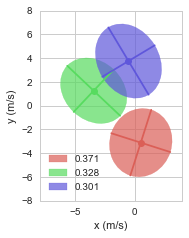

In [56]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [57]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmwK3d9L/jpbnVr19n3/ZxrAwFCzFoUIctNiAnFMokB
Q1WYCUXqzbxHTKB4eawGP+AGE4jJezHxPDtlmLn2xHaYlwIn1FQlIQkJqbDEmADG4Hv2TUf7LvU+
f+j8Wt2tbqlbat0rHfenisL3qPvXP0ndH32+O6WqqgofPnz4uKCgb/QGfPjw4WOQ8EnOhw8fFxo+
yfnw4eNCwyc5Hz58XGj4JOfDh48LDZ/kfPjwcaHhk5wPHz4uNHyS8+HDx4WGT3I+fPi40PBJzocP
HxcaPsn58OHjQsMnOR8+fFxo+CTnw4ePCw2f5Hz48HGh4ZOcDx8+LjR8kvPhw8eFhk9yPnz4uNDw
Sc6HDx8XGj7J+fDh40LDJzkfPnxcaPgk58OHjwsNn+R8+PBxoeGTnA8fPi40fJLz4cPHhYZPcj58
+LjQCNzoDfi48VBVFYIgQJIkMAwDlmVB0zQoirrRW/Pho29QqqqqN3oTPm4ceJ5HsVhEPB6HKIoA
gJOTE0xMTCAej4OmaZ/0fIw0fCX3LIYsy6jX60in04hGo5AkCSzLQlVVqKoKWZYhSRIEQQBFUWAY
xic9HyMHn+SehVBVFZIkQZZlUBQFWZaxvb0NWZYRCASgKApqtRqCwSACgdYtQkiP53nQNA2GYcAw
DAKBgE96PoYWvrn6LIOiKBBFEeRrPz09RS6Xw+rqKjiOgyAISCaToCgKoigiEAggEokgHA4jEomA
YRjDemQdiqI0sgsEAm3H+fBxo+AruWcJiPkpyzIAQJIkHB0dQVEUsCyLeDwOQRAQCoXAsizGxsYQ
jUbB8zxqtRqKxSLOzs400iPEpyczSZKgqip4nkcqlcLc3Bw4jvNJz8cNhU9yzwIoigJJkqAoCiiK
QrlcxvHxMSYnJ5FIJHBwcGA4nqIoqKoKiqIQCoUQCoUwOTkJVVXRaDRQr9dRKBSQTCbBsqxGeHrS
q1arEARBIz1i3vpKz8f1hk9yFxzEj0aCCclkEqVSCSsrK5pSc+qxoChKIzM96dVqNRQKBZyenoLj
OEQiEaiqqpEq0PID+qTn43rDJ7kLCkVRIMsyFEUBAAiCgMPDQ3Ach62tLS2g0E+wQE965JpE6SmK
gsPDQwSDQc2fFw6HQdPN/HOf9HxcL/gkdwGhKAoymQyKxSJWV1eRz+eRTCYxOzuLycnJNmIzKzli
rroFTdOav65UKmFhYUGL1OZyOTQaDQSDQYN524n0KpUKEokEgsGgT3o+eoZPchcMxDwFmsRxdHSE
er2OjY0NhEKhtuMHmfZB0zRCoRAikQiAJvnW63XU63Vks1nwPI9QKKQpvVAoZCC9VCqFQCAASZJ8
peejZ/gkd0Fgzn0TRRGVSgXj4+PY2trSyMPuXGCwhAc0SS8ajSIajQJokV6tVkMmk9FIjyg9Evwg
ytLOvOU4zs/R82ELn+QuAMy5b5lMBqlUChzHYWlpqeO5VuTQq7nqFmbSIxUYpApDkiQkk0lEo1FN
6XULZJDaW5/0fBD4JDfiIOoNaJLE8fExJEnC/Pw8SqWSozWGJR+cYRjEYjHEYjEAwM7ODhKJBARB
QCqVgiiKBqVnRXqiKKLRaGikR1EUWJb1zdtnMXySG1GYzdNKpYKjoyOMj49jdXUV1WrVEXnZKR4v
iK/fNSiKQiQSwfj4OICW0qvVajg7O4MkSRrpRSIRBIPBNtI7PT3V1vCV3rMTPsmNIPS5bwBwdnaG
fD6PpaUlxONx7bheScYLAhgEiZiVniRJGuklk0lIkmRIVwkGg9pe7JSeT3oXHz7JjRBUVUU2mwXL
sgiFQhBFEUdHR6AoCltbW2BZVjvW6UN7vfxvg0AgEEA8HteIXU96hUIBsixrAZdgMGgIUOhJj/j0
CPH5pHex4JPciICUZuXzec1PdXx8jOnpaUxPT7c9lP2S1ygSnxXpnZycaP8vy7Kh2YCe9BRF0QI4
etILBAIIBAI+6Y0wfJIbAciyrDW0BIB8Pg9BELC2tqbloPUKfZ2q/m8XAYSgCPGJomhQeoqiaIQX
iUQMCk5PeqIoolwuY25uzie9EYRPckMMc3Ch0WigUqkgGAzi0qVLHSOGo2yGDgosy4JlWSQSCQCA
KIqo1Wqo1+vI5XJQVdWg9AjpSZKEWq2mmbcURflKb4Tgk9yQQt85BAByuRzOzs4QCoUwNjbWNSXC
KcnpfVRuzx11kJZSY2NjUFXVoPRyuRwAIBwOa41E9YpXr/R80htu+CQ3hNDnvimKgpOTEzQaDWxs
bGgP37MBXqWxOCEciqLAcRw4jjOQXq1WQ7lcBs/z2N3dtVR6gE96wwyf5IYIZvO0Vqvh8PAQ8Xhc
K81yo9DctFAahHLzYs0bRQ560mNZFrlcDnNzc6jVaqhWq8hkMqBp2pCyYkd6QDP9hSQz6/P5fAwe
PskNCcy5b+l0GplMBouLixgbG+tpzX7y5LxI5L0oUFVVq5HlOA7j4+PaGMdarYZKpYJUKgWGYQyB
DL2CUxQFqVQK0WgU8XjcMBSIVGb4GAx8krvBUFUV1WoVp6enWF1dhSzLWlvyra0tcBxnON6tr80J
LrIPzqm56hYURSEYDCIYDGJiYsJAeuVyWSM9fat4fcMBK6VHhgL5pOctfJK7gSDBBTIBi7Qln5iY
wOzsbF/F8xeZuK43nBClFenxPI96vY5SqYSzszOtWzLQCmiYzVtBEACgbSiQT3q9wye5GwS9eUpa
Ix0fH2N5eVkrW7KCG/JyQ3KZTAalUgmhUEgbTeijiV5+LPTzMQjpHRwcIBAItA0F0k9CI2RGhg6Z
Z976pOce/p18nWHV9+3o6AiqquLSpUuOyMVLc5WkqZTLZczOzmopFJVKBfV63WBudepJN6zwylzt
dw0ScU0kEtoMDNIqvlgsIplMguM4QyDDjvROT0+xsLBgmITmk549fJK7jjBPzSoWizg5OcHk5KQ2
47QbvKxJJdFbiqKwurqqzWwgZlUsFrNsXW7u4nvRMQi/npuhQPpJaBRFoV6va1UwvtLrDp/krhP0
uW+qquLk5ATVahXr6+taioITeOFrI4X+6XQaS0tLODk5sSzrIg/X1NSUoYtvOp2GIAiGSKJVWoTv
EzSiE1l2GgqUz+dxenqqDQUiicnkPMA3bzvBJ7kBw6o06/DwEOFwGFtbW2AYBrIse57TZnecJEla
Y00SvT05OemqVuy6+Fq1OSLm2DDgeiYUe7mOfigQ+ZEhSk9VVezt7VkOBdKTniRJPunBJ7mBwlxY
n81mkUqlMD8/j4mJCe3vg0jctTqOmKeJRAIrKyuaudnLDW/V261Wq6FWqyGfz0OSJGSzWcTjca06
wC28IspheaD7IUs96eVyOWxuboLnedRqta5DgQBr0uN5HrFY7MJXZPgkNwCoqgpZlvGjH/0Ily5d
AgCcnJxAEARsbm5qzRwJ3Jqgbh9+s3lKCtTNx5AbvReTOBAIIJFIIJFIQFVV7O/vIxgMakNqyENK
HsJRit4OKteuF5DvRU96gP1QoE6kt7e3h7W1NS0hmSQn6xXhRcDo3GkjAnNhfbVaRTKZRCKRwPLy
ctepWU7ysZyAHGdlnva6plOQSGIsFtMCGeZEWZI+oY8kdnofvWJYzGbAG7LUJxTr0WkSGvGh6lvF
h0IhqKqqfe5WSo8kJ4866fkk5yHMpVmkuN5OPRGQm9Ypybl5cLe3txGPxw3mqRXMa3pJDlaJsuZI
4iAjt14RS7/wkuS6odMktFQqBUEQoKoq8vl82yQ0crwkSW2t4keR9HyS8wDEPJUkSes/RnLfVldX
Oyb3mtfpBic

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

## Goodness-of-fit Statistics

In [58]:
gmm_pdf_result = exp(clf.score_samples(FITTING_RANGE))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.977  0.012      0.112    13643.816  2.025455e-07      0.036       0.192

In [59]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [60]:
max_speed = df.speed.max()
# max_speed = ceil(df['speed'].quantile(.999))

In [61]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-FIT_LIMIT, FIT_LIMIT),(-FIT_LIMIT, FIT_LIMIT),
         (0., FIT_LIMIT),(0., FIT_LIMIT),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, FITTING_RANGE, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.282918178065135
     jac: array([  2.28702784e+00,  -4.76837158e-07,   2.38418579e-07,
        -2.38418579e-07,   0.00000000e+00,  -2.38418579e-07,
         2.28701353e+00,   0.00000000e+00,  -2.38418579e-07,
        -4.76837158e-07,   0.00000000e+00,   1.43051147e-06,
         2.28700781e+00,  -2.38418579e-07,   4.76837158e-07,
         4.76837158e-07,   0.00000000e+00,   2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 2197
     nit: 108
    njev: 108
  status: 0
 success: True
       x: array([ 0.04781457, -1.88520081, -1.20081126,  1.06950618,  1.7726969 ,
       -0.49765661,  0.69817058, -1.81695933,  2.04974685,  3.25769316,
        3.3861598 , -0.02293098,  0.25401485,  1.0219601 , -3.89062326,
        2.44990507,  2.73956117,  0.29894901])

## 6.1 GMM Result

In [62]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(FITTING_RANGE)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.698  -1.817   2.050  3.258  3.386  -0.023
2  0.254   1.022  -3.891  2.450  2.740   0.299
3  0.048  -1.885  -1.201  1.070  1.773  -0.498

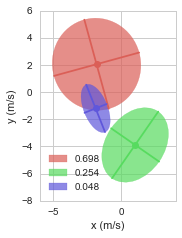

In [63]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [64]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.076    18707.082  8.480442e-08      0.023       0.124

In [65]:
# Empirical Power
if 'gofs_mean_set_bivar' in globals():
    display(gofs_mean_set_bivar)

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.276953  2.684603e+06  0.018811  1.321299e-07    0.027436   
(1991, 1996)    0.117373  1.312346e+06  0.018339  1.436740e-07    0.029923   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.154744  0.985249  
(1991, 1996)     0.161446  0.983623

In [66]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmULFd9JvjFmlvt+6uqV+tDsowbjEDIGi+y1Y0xjDnG
zWDDnJlpBrp78GBolmNACFkM4hmxSbjBqI1s7B49PBKWm8EcGPvYZjPQLLIsbEsCpFfvVVVWVlVW
LpV7Zmx3/si6UTcjIyIjMqNeZZbiO+edqlcZeeNmZsSXv/X7cYQQghAhQoQ4o+BPewMhQoQIcZII
SS5EiBBnGiHJhQgR4kwjJLkQIUKcaYQkFyJEiDONkORChAhxphGSXIgQIc40QpILESLEmUZIciFC
hDjTCEkuRIgQZxohyYUIEeJMIyS5ECFCnGmEJBciRIgzjZDkQoQIcaYRklyIECHONEKSCxEixJlG
SHIhQoQ40whJLkSIEGcaIcmFCBHiTCMkuRAhQpxphCQXIkSIM42Q5EKECHGmEZJciBAhzjRCkgsR
IsSZRkhyIUKEONMQT3sDIU4fhBAoigJN0yAIAiRJAs/z4DjutLcWIkTP4Agh5LQ3EeL00Gg0UCgU
MDw8DFVVAQCpVArj4+MYHh4Gz/Mh6YUYaISW3LMYuq6jVqvh4OAAiUQCmqZBkiQQQkAIga7r0DQN
iqKA4zgIghCSXoiBQ0hyz0IQQqBpGnRdB8dx0HUdly9fhq7rEEURhmGgWq0iEolAFI8vEUp6jUYD
PM9DEAQIggBRFEPSC9G3CN3VZxkMw4CqqqAf++7uLnK5HJaWliDLMhRFwd7eHjiOg6qqEEUR8Xgc
sVgM8XgcgiC0rEfX4TjOJDtRFNuOCxHitBBacs8SUPdT13UAgKZpSCaTMAwDkiRheHgYiqIgGo1C
kiSMjo4ikUig0WigWq2iUChgf3/fJD1KfCyZaZoGQggajQbS6TRmZ2chy3JIeiFOFSHJPQtgGAY0
TYNhGOA4DqVSCTs7O5iYmMDIyAi2trZajuc4DoQQcByHaDSKaDSKiYkJEEJQr9dRq9VweHiIvb09
SJJkEh5LepVKBYqimKRH3dvQ0gtxrRGS3BkHjaPRZMLe3h6KxSLOnz9vWmpeIxYcx5lkxpJetVrF
4eEhdnd3Icsy4vE4CCEmqQLHccCQ9EJca4Qkd0ZhGAZ0XYdhGAAARVGwvb0NWZaxvr5uJhR6SRaw
pEfPSS09wzCwvb2NSCRixvNisRh4vll/HpJeiGuFkOTOIAzDQCaTQaFQwNLSEvL5PPb29jAzM4OJ
iYk2YrNactRd9Que5814XbFYxLlz58xMbS6XQ71eRyQSaXFv3UivXC5jZGQEkUgkJL0QXSMkuTMG
6p4CTeJIJpOo1WpYXV1FNBptO/4kyz54nkc0GkU8HgfQJN9arYZarYZsNotGo4FoNGpaetFotIX0
0uk0RFGEpmmhpReia4Qkd0ZgrX1TVRXlchljY2NYX183ycPpucDJEh7QJL1EIoFEIgHgmPSq1Soy
mYxJetTSo8kPalk6ubeyLIc1eiEcEZLcGYC19i2TySCdTkOWZSwsLLg+144cunVX/cJKerQDg3Zh
aJqGvb09JBIJ09LrlMigvbch6YWgCEluwEGtN6BJEjs7O9A0DXNzcygWi57W6Jd6cEEQMDQ0hKGh
IQDAxsYGRkZGoCgK0uk0VFVtsfTsSE9VVdTrdZP0OI6DJEmhe/ssRkhyAwqre1oul5FMJjE2Noal
pSVUKhVP5OVk8QRBfL2uwXEc4vE4xsbGABxbetVqFfv7+9A0zSS9eDyOSCTSRnq7u7vmGqGl9+xE
SHIDCLb2DQD29/eRz+exsLCA4eFh87huSSYIAjgJErFaepqmmaS3t7cHTdNaylUikYi5FydLLyS9
s4+Q5AYIhBBks1lIkoRoNApVVZFMJsFxHNbX1yFJknms15v2WsXfTgKiKGJ4eNgkdpb0Dg8Poeu6
mXCJRCItCQqW9GhMjxJfSHpnCyHJDQhoa1Y+nzfjVDs7O5iamsLU1FTbTdkreQ0i8dmRXiqVMn/q
ut4iNsCSnmEYZgKHJT1RFCGKYkh6A4yQ5AYAuq6bgpYAkM/noSgKlpeXzRq0bsH2qbJ/OwugBEWJ
T1XVFkvPMAyT8OLxeIsFx5KeqqoolUqYnZ0NSW8AEZJcH8OaXKjX6yiXy4hEIrhw4YJrxnCQ3dCT
giRJkCQJIyMjAABVVVGtVlGr1ZDL5UAIabH0KOlpmoZqtWq6txzHhZbeACEkuT4FqxwCALlcDvv7
+4hGoxgdHe1YEuGV5NgYld/nDjqopNTo6CgIIS2WXi6XAwDEYjFTSJS1eFlLLyS9/kZIcn0ItvbN
MAykUinU63Wsrq6aN9+zAUGVsXghHI7jIMsyZFluIb1qtYpSqYRGo4ErV67YWnpASHr9jJDk+ghW
97RarWJ7exvDw8Nma5YfC82PhBK9QVm5814RBEmdFjmwpCdJEnK5HGZnZ1GtVlGpVJDJZMDzfEvJ
ihPpAc3yF1rMzNbzhTh5hCTXJ7DWvh0cHCCTyWB+fh6jo6NdremVZAghuHr1aktWUZZlqKraUpbi
B2fpJiaEmO+JLMsYGxszxzhWq1WUy2Wk02kIgtCSyGAtOMMwkE6nkUgkMDw83DIUiHZmhDgZhCR3
yiCEoFKpYHd3F0tLS9B13ZQlX19fhyzLLcf7jbV1Am39Gh4exuLiIlRVRTqdhqIo2NzchCAI5k1r
N+Oh3+HVXfULjuMQiUQQiUQwPj7eQnqlUskkPVYqnhUcsLP06FCgkPSCRUhypwiaXKATsKgs+fj4
OGZmZnpqnu90HCEE+/v7KBQK4DgOk5OT0HUdsiybPaETExNoNBqo1WooFovY3993lDs/y/BClHak
Z33vqFoycJzQsLq3iqIAQNtQoJD0ukdIcqcE1j2l0kg7OztYXFw025bs4CfW5nQcVQkWRRHr6+t4
+umnzX1Yf9IZD/TGpXLn+Xweu7u7pgimVQ/uLKGb2KLde7e1tQVRFNuGArGT0CiZ0aFD1pm3Ien5
R0hy1xh2um/JZBKEEFy4cMFT4L8Xd7VYLLp2SnRak1pwk5OTpty5nR4cLbk4bQTlrva6Bs24joyM
mDMwqFR8oVDA3t4eZFluSWQ4kd7u7i7OnTvXMgktJD1nhCR3DWGdmlUoFJBKpTAxMeE5s9ltTyrr
ntp1SvQqdw60qoTQkYdsPG9QxS1PIq7nZygQGxrgOA61Ws3sggktvc4ISe4aga19I4QglUqhUqlg
ZWXFLFHwgm4Kda3uqZVM7fpeaezID1iVkFqthsnJSRBCPLVRPRvgRpZuQ4HY0EAsFmuxkkP3tjNC
kjth2LVmbW9vIxaLYX19HYIgQNd1XzVtfhIPXt3Tk7BWaEkFbZi3tlEBaMk+dluu4oZrWVAc5Dqs
lWwNDdCSH7uhQCzpaZoWkh5CkjtRWBvrs9ks0uk05ubmMD4+bv7db+Gun8TD7u5ux0b+kyqxsMKu
jYrWmR0cHLTc2LTk4qT2chrohSzZ9yaXy2FtbQ2NRgPVarXjUCDAnvQajQaGhobOfEdGSHInAEII
dF3HE088gQsXLgAAUqkUFEXB2tqaKeZI4dcF7XQsdU8B2LqnTmvSC/1a9K6yHQXW4lpacmEYBrLZ
LIaGhk61XOWkau26Af1crPFQp6FAbqR39epVLC8vmwXJtDiZtQjPAkKSCxjWxvpKpYK9vT2MjIxg
cXGx49QsL/VYbqDu6fT0NGq1midi6IcL2q7O7PLlyxAEoadylX7I8FIEQZZsQTELt0loBwcHUBSl
RSo+Go2CEGJeH3aWHi1OHnTSC0kuQFhbs2hz/cLCginvYwd60XolObsblxCCvb09FItF0z3d29vz
fGNZ1zxtcqD

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

In [67]:
%%time
if df_all_years.index.year[0] <= 2000:
    # GMM test against previous data
    fig1, ax1 = plt.subplots(figsize=(3,2.5))
    fig2, ax2 = plt.subplots(figsize=(3,2.5))
    gofs_mean_set_bivar_previous = []
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    for year_length in [10]:
        color = next(prop_cycle)
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
           for sub_start_year in arange(start_year, end_year+1)) 
        gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
        gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
        gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
        gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
        gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar_previous.append(gofs_mean)

    print('10 year comparison')
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    align_figures()
    display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


10 year comparison


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAAC3CAYAAADtj5nqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXl8jNf+x98zk31fiUQiEgSxRKJEY6eNtSq2JgStLtRW
SmmvS0u321qKe0u1lLq/UlTpQpVYbyxZSIKESCKRRRLZt8kyM8/vj9RUKmSRTCbxvF8vL+aZ5znn
e8Z85jzPOd9zPhJBEARERES0BmlTByAiIlIVUZQiIlqGKEoRES1DFKWIiJYhilJERMsQRSkiomU0
mSgjIyMJDAx86PjJkyeZMGECU6ZMYd++fQCoVCpWrlzJlClTCAwMJCkpSdPhiohoDJ2mqPTrr7/m
559/xtDQsMrxiooKPvnkEw4cOIChoSH+/v4MHTqUy5cvU15ezg8//EBERASffvopW7ZsaYrQRUQa
nSbpKZ2cnNi8efNDx+Pj43FycsLc3Bw9PT28vLwIDQ0lPDycAQMGAODh4cG1a9c0HbKIiMZokp7S
19eXlJSUh44XFRVhamqqfm1sbExRURFFRUWYmJioj8tkMhQKBTo6jw4/PDy8YYMWEWlgvLy8qj3e
JKJ8FCYmJhQXF6tfFxcXY2pq+tBxlUr1WEHe51GNDg8Pf+R7LRmx3Y2PIAhcib1HWbmCft3tAdj5
63WuxWfTx92Ovu52ONmZcvny5UeWoVWidHV1JSkpiby8PIyMjAgLC2PWrFlIJBJOnTrFqFGjiIiI
oFOnTk0dqohIFcoqlJwOT+bw2QSSMwqxtTSkj3sbZFIJ00d1RSqV1LosrRDlL7/8QklJCVOmTGH5
8uXMmjULQRCYMGECrVu35rnnniM4OJiXXnoJQRD4+OOPmzpkEREA7uXK+f1iIkfPJ1JYUo5MKmGw
Z1vGDXRF9qcQ6yJIaEJRtm3bVj3lMXbsWPXxoUOHMnTo0CrnSqVSVq9erdH4REQeRKkSuJ2Wz63k
PNLuFTHrhW4ApN0rYt+JWEyNdJk0rCOjfdpjbW5YQ2mPRyt6ShERbSYiNpNvDl8jKb1QfcxvSAcs
TQ3o6GTBkqle9O1mh4Few8hJFKWIyCPILSjlPwciuXQ9HYkEBvZyoGdHWzo6WmBmrA+AkYEugzzb
Nmi9oihFRB6Bvp6M2Du5uLtY89q4bri2tdBIvaIoRZ56lCqBjOxiktILuZ2Wj72tCYM922JkoMva
hQOxtTBEIqnbYM2TIIpS5Knlh+M3OR91l5TMQsoVKvXxVlZGDPBwQCaV0MrSSONxiaLUEJcuXeKt
t96iQ4cO6mOWlpZs2rSpXuUtWrSIf/3rX+jp6amPxcTEEBQUxLx582pdzsGDB0lISGDJkiX1iqM5
cy9PTkpmIW1bm+JkZ4pTa1Pa2Znh1s5SPZ3RFDzVopz14R/VHvcb3IHR/V0AWPd9ONEJ2Q+d49bO
incCe9epPm9vbzZs2FD3QKuhunK6dOlCly5dGqT8lsr5qDQ8O7fCQE+HV8a6M2dCzyYVYHU81aLU
BgIDA3Fzc+PWrVsYGRnRu3dv/ve//1FQUMCOHTsICgrixIkTFBcXk5uby9y5c/H19WXo0KEcPXqU
VatWkZeXR15eHrNmzeLIkSNs2LCB/fv3s2fPHlQqFUOHDmXBggUcO3aMjRs3IpfLsbS05N///ndT
N1+jHLuYxL/3RzDAw4F3AntjZKDb1CFVy1Mtyu0rnq/xnLcDGi5n8uLFi1XWkA4aNAiAHj16sGLF
CmbNmoWBgQHffvsty5YtIzQ0FAC5XM63335LTk4OkyZNYtiwYVXK9fb2ZubMmVy6dAmA7Oxs9fI4
fX191q1bp07s37lzJ1KplFmzZnH16tUGa5u2c+5KKv85EIGpkR4vPafdaZpPtSg1TXW3r2fOnMHd
3R0AMzMz9TOnmZkZZWVlADzzzDNIpVJsbGwwMzMjJyenShnt27ev8jo5OZmOHTtiYGAAoH5e1NHR
YfHixRgZGZGeno5CoWj4RmohsalyfjgXjqG+Dqtf74eTnVlTh/RYRFE2A65fvw5AVlYWRUVFWFtb
V3n/78P1Tk5OJCQkUF5ejp6eHgsWLGDatGmEhYVx5MgR5HI5fn5+PA37cF+Lz2Lf/7KRyWSsnOVN
B0fNzDU+CaIoNcjfb18BSktLa7wuKyuLGTNmUFhYyKpVq5DJZI8938rKitdee41p06YhkUgYMmQI
3bt3R19fn5deegkAW1tbMjMz69+YZkJaVjGCAO/NfAZ3F+uaL9AGhBZKWFhYvd7TNn788Ufh888/
b5CymlO764u8tEL48WSskJpZqD4WdPZiE0ZUPY/7vxB7SpEWQWmZgiPnb3PwdBz5ReWkZRUzb5IH
AOZGzetr3ryifQrx8/Nr6hC0nusJ2XyyK4T8onKMDHTwf96NFwa4NHVY9UYUpUizprCknM//G0ZR
SQUvPefGuIEumBjp1XyhFiOKUqRZk19UhoGeDv6+zkwZ7tbU4TQIoihFmjVtW5nyxeJB6Mpazmb/
LaclIk8VmTklpGRW7gRgoKeDTBSlSF1JTk5mwYIFTJ48menTp/P6669z69YtADZv3kyXLl3IyMhQ
n5+dnY27uzsHDx4kJSUFNzc3tm3bVqXM2bNnV2v9oA189NFHpKWlNUrZSpXAuu/DWbj+DGn3ihql
jqbkqb193fHLdYIjUxukLJ+eDrwy1v2R78vlcubMmcOaNWvo1asXAFFRUaxevZrdu3cD4OzszNGj
R5k5cyYAR44coU2bNuoynJycOHbsGK+//joAubm5JCUlYWNj0yBtaGj+8Y9/NFrZP568RfTtHHx6
2tPGxrjR6mkqxJ5SA5w6dQpvb2+1IKEyCf27775Tvx41ahS///57lWuGDBmifm1paYm1tTXx8fEA
HD16lBEjRlRb344dO9QmSZ9//jlQ2Rtv2bKFV199lVGjRnHu3Lkq16SkpDBhwgRmz57N+PHj1Tm6
y5cvZ/bs2bz00kvk5+ezbt06/P39mTJlCkePHiUnJ4eRI0eqU/ZWr17N8ePHCQwMJD4+noKCAt54
4w2mTp3KSy+9xIULF4DKXQvv5/auXbuWgwcPkpOTw/Tp0wkMDGTy5MnExMQ81LZbybl8f+wGVmYG
zJ3YU6M7AmiKp7anfGWs+2N7t4YkJSUFJycn9es5c+ZQVFREZmYmu3btAsDGxgZDQ0OSk5NRqVTY
2dmhr69fpZzRo0fz22+/sWDBAoKCgli8eDFhYWFVzrl58yZHjx5l79696OjoMH/+fE6dOgVUJqRv
3bqV4OBgduzYofZnuU9qairbt2/H1NSUgIAAdc7t/VUoZ86cISUlhT179lBWVsbkyZPx8fHBzc2N
sLAwevbsyaVLl3jvvffUPzhbtmzh2WefZcaMGWRkZODv709QUFC1n1NUVBQWFhZ89tlnxMXFUVJS
UuX90jIF6/4vHKVKYJF/L0yb+dTHo3hqRalJ7OzsqpgS3XcMmzx5cpWVGvdFp1AoGDt2LMHBwVXK
GT58OFOnTsXPzw9bW1v1KpAHSUhIoGfPnujqVq4V7N27t/rZ1dnZWR1PeXn5Q9d27twZC4vKhO0e
PXpw+/Zt4K9VKLGxsVy/fl39HKtQKEhNTWXy5Mn89NNP3Lt3j6FDh1axlIiPj1fv69u6dWtMTEzI
zq66aPx+Lztw4EASExN588030dHRYc6cOVXOO3g6jtR7xYwb6IpHp1YPxd9SEG9fNcCwYcO4cOEC
ERER6mNJSUmkp6dXuf3y9fUlKCiIsLAw+vbt+1A5xsbGtG/fns8//5wxY8ZUW5eLiwtRUVEoFAoE
QSA0NFQtqppu9eLj45HL5SiVSqKiotTLyO5f5+LiQt++fdm9eze7du1i5MiRODo60q9fP2JiYvjx
xx+ZNGlSlTJ

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(1991, 1996)    0.085535   1205.056365  0.020725  2.431633e-07    0.043333   

              RMSE / Mean  R_square  
year_lim                             
(1991, 1996)     0.210581  0.971776

Wall time: 16.2 s


## 6.3 Univariate Goodness-of-fit

In [68]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [69]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)
speed_params = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']

Speed Distribution Comparison
0.970519771561 0.968038347839 0.959749969056
Wall time: 28 s


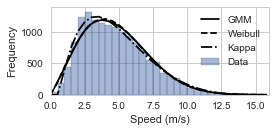

In [70]:
%%time
x = bins = arange(0, max_speed+BIN_WIDTH, BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, density_expected_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, bins, bin_width=BIN_WIDTH)

y_gmm_em  = array([integrate.nquad(f_em, [[x_, x_+BIN_WIDTH],[0, 2*pi]]) 
                   for x_ in x])[:, 0]

# 3. Plot Comparison
df['speed'].hist(bins=bins, alpha=0.5, label='Data')
plot(x[:-1]+BIN_WIDTH/2, density_speed_expected_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text, ylabel='Frequency', 
              legend={'loc':'best'}, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

density, _ = np.histogram(df['speed'], bins=x, density=True)
R_square_gmm = sector_r_square(density*BIN_WIDTH, density_speed_expected_gmm)
R_square_weibull = sector_r_square(density*BIN_WIDTH, density_expected_weibull)
R_square_gmm_em = sector_r_square(density*BIN_WIDTH, y_gmm_em[:-1])

print(R_square_gmm, R_square_weibull, R_square_gmm_em)

In [71]:
density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
print(sector_r_square(density*BIN_WIDTH, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*BIN_WIDTH, density_expected_beta))

0.98726407169


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


0.980631796574


In [72]:
%%time
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--',label='Weibull')
plot(x, kap.cdf(x),'-.', label='Kappa')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Data')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1- kap.cdf(x))),'-.', label = 'Kappa')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

# 5.2. CDF Comaprison
cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAVOX+x/H3zMCwDaKA4gouuZspmktulXo1lzY0NFO7
2TX93bLMTPNezUzRsu1eS83yZmHmlpWYW6BJ4QqIiCjihqJsyjrDzpzfH8YkYWg4h0H4vv6JOc+Z
M5/OzHx9zjnPM0ejKIqCEEJUgtbWAYQQdy8pIEKISpMCIoSoNCkgQohKkwIihKg0KSBCiEpTtYAc
O3aM8ePHl1u+Z88e/Pz88Pf3Z+PGjWpGEEKoyE6tDX/22Wds3boVJyenMsuLiopYvHgxmzdvxsnJ
ibFjx/Lwww/j6empVhQhhEpU64F4e3uzbNmycsvPnj2Lt7c3bm5u6PV6unXrxpEjR9SKIYRQkWo9
kCFDhpCYmFhuudFoxNXV1fLYxcUFo9F4y+1FRERYNZ8Q4vZ169btpstVKyB/xmAwYDKZLI9NJlOZ
glKRP/ufqGoRERGS5SaqQ5bIuFSCD1/k7MVUWnk3YFAPb3zbNuBgbCJfBu8nK+8cBcVpuBZlwf40
mhTnYSgqxKtLY3b2dQOg7fl8hh7IJuR+V74+eJT47TH8p88AvOu7kafXYtJCrlZLrlZHntaO3BJ7
CvKdKbF3wOyix+hmwOBeH2OeFnudAwVFGlwNdbGzc6CZVz3QaEi6Wv4fzcaeBhT4y21ZxkLcDPpb
PseUm4uLs/Nffq1n+v/597PKC0irVq1ISEggMzMTZ2dnwsPDmTRpUlXHEDVQZFwqgdtjKdEUUFJS
QnT0MfaGfUPT9tk0MhVx37UiGl0tol52CToz4GQHXP9y5CTmk/KzGTtcOWs2EOzuSto1b0YP8Sfn
IT3ntDrO3fBajT0NaICs375kWn4/H9DC08DAHt4Ebo8Frn9xHR2vf3EH9fQBsLTdaGAP70q1DX2g
OQeir1htexW1/VGVFZCgoCByc3Px9/dn9uzZTJo0CUVR8PPzw8vLq6piiBqgtJeRfM1EQw8X+vh6
ojFcZeWeIHKckrBz07L134E00drx3z79qJfkYHluIZBkZ0e6Yx1MhoYUNWiOc7PmXMjV4qvRWNbL
BHz+UAhudKsvoG/bBgCEHL7I2Uu5NP5tW6XLS9uS0000dHe547Z7mta95XMqm6MimrtlNm516B6X
kiw3VxVZSnsZABn5p8l2P4bOrQSNRoPvyVx8Y0186JPHsaBzNKzbkgVeLlw1eELz9iQ4eJHl4oGi
1Vm217iCIjF+WAd82zYgMi71T79kFbWVqi7vUWVzVPS8Kj+EEaIyzIqZU2lnWRn2A7Eh8aRF78XX
XU/3kV3ZnZhFzvlsWuXXx1yso4fdkzQb3wgXZ2dC+L1IHLuN3sLNCoFv2wblikKpitpqAykgolqK
jEvlp8MJXMq6jOJ2iUxdPCUU0vJaAWPzL9K5Sye0Gg250Xmcbu+He3cfRg1uzdpdp0Gjgdxcy7bu
tEiIPycFRFQ7kXGpfLHrMCmuIVA/n3pZxdx/ykj78/kYzFpwqUuqoQGXG7XnikcL6jm60sjDQLeO
TdDY2f/p8b4UCeuTAiKqjdyiPDRo+CxwK7u+/RS/x1rQ+XwBLfOvf0wL7Byx69OPH/MbkuPiXua5
pSc1S4tEdTnvUNNJARE2l5mXxfb4vWw/tYfMw0n8+P5mlvfpT+eTJYAdyXWbcqFxR5IbtGLp9IHY
38aJSzX98SrQoCp+/epECoiwmV9izrE+OohUTRw6zDhdMXHq+Elad+pFeuvenHF0JL5ZV0xO1wd4
NfY0ALY9FLnxKhBcH2xV+rgymQ4dOsQrr7zCPffcg6IoFBcXM2HCBIYNG3bT9a9cucKpU6d4+OGH
K/c/YGVSQIRNrDu0l+/PfAt2JZiSMnkmJJs6ZnsemhBAp+69CNwey9U/PKf0MMWWgv9kXETI4YuV
Lmq9evXiww8/BK6PzB4/fjwtWrSgffv25dY9ePAg586dkwIiaq+CggIC/7ceV99Cjn4XTvElF5K7
96PI2YVr+fVuecXElpKvmW6+PP3my/8qFxcX/P392b59O2vXriU5OZnU1FQefvhhpk2bxqpVq8jP
z6dr1664urry8ccfoygKJpOJ999/nxYtWlglx+2SAiJUVXq+4HLGNYo8T9JR05i1AQsZ5uBEq3Pu
FDZ7ihZD+nEJuARojWag+l4xaejhctP5Iw3dXaz2Gh4eHuzevZuhQ4cyevRoCgoK6N+/P9OnT2fy
5MmcO3eOgQMH8vXXX7N06VK8vLxYuXIlO3fuZOrUqVbLcTukgAjVRMal8tX2E+Q6nyXLMxo0hZz+
4UfeatYcF3t70gwNaN/Gl/wbnmPNL6IaBt1iaLs1XLlyha5du3L8+HEOHjyIwWCgsLCw3HpeXl4s
WrQIZ2dnUlJS8PX1tVqG2yUFRKhm5+F40uuFke90mXpJefQNSaOltg6FjnbYP+7PvqvXZ6beqDqc
56iI2odXRqORTZs2MWrUKPLy8liwYAEJCQls3LgRRVHQarWYzdd7aXPnzuWnn37CYDAwa9YsbDEr
RQqIUMXFzMsc134HOiPddyfTK02LTuvIhfqtOdF2AAETHsHOxpdjK8vah1cHDx5k/PjxaLVaSkpK
eOmll2jRogUzZswgKioKvV6Pj48PqamptGnThhUrVtCxY0ceffRRxo0bh5OTE56enqSmplot0+2S
AiJUUWgqwOlaOoP3pOGt6MnUuxDdYTCp9ZpVi8ux1UXPnj05cODATdu2bt1abpmXlxe7du0CYPjw
4apmux1SQITVFJgLuZR1haxL6SwcP5G/N26CwU5PfP02HG83ELPu+setuh+miNsnBUTcsci4VLYe
ieKUshvzyXx2zVzHi41b4mivRzdqPGlKE0g30fguOkwRt0cKiLgjkXGpfBayh/R6v+JQWMSx4Gjy
c/KpN/4f3P/UcJybNqWXrUMK1UgBEXdk05FQrrn/QuOkXB7Zk07u2Tw6v/gJSv17cW7a1NbxhMrk
znSi0n5NOMJZuxBKCosI/nIfhSXQ828T8GzUwmojM0X1Jj0QUWkedm5ok3IJWb6Teo5tCLp/Ai51
PYDqPyBMWIf0QMRfoigKpsJcsjMz2fHcK4zenkpL1w4Mm/gm6H+/C6Fcabl9ly5dYtq0aTz11FNM
mDCByZMnEx8fz7Jly2jfvj0pKSmWda9du0bHjh3ZsmULiYmJtG3bllWrVpXZ3pQpU256S1k1SA9E
3JbSnxiMK/qVEvtEen59kp6OTqRqYNnbH/BLvImzl1Jv+qvfd5uZM2eyadMmq2xr9OjRjBkz5k/b
8/LymDp1Km+//TZdu3YFIDo6mgULFtCjRw+aN2/Ojh07ePbZZwHYvn07jRo1sjzf29ubXbt2MXny
ZAAyMjJISEioslvFSg9E3FLpnJaTxXsptD/F0OCL3OfgxHkFHvnqC3r1as/M8d35xxAvZo7vflcX
j6q2d+9eevXqZSkeAJ07d+arr74CYNiwYezcubPM+g899JDlcb169fDw8ODs2bMA7Nixg6FDh1ZR
eumBiNsQfPgi2XWOgeYMT25PxytXITyviIIxs3CsU8fW8axu6dKlLF261Grbq+i2rImJiXh7/364
N3XqVIxGI6mpqXTv3p1OnTrh5OTEpUuXMJvNNGzYEAcHhzLbGD58OD/++CPTpk0jJCSEV199lfDw
cKvlr4j0QMQtxedFomhjGbXjevHYayri/N9eIiWn2NbR7noNGzYscw/pFStWEBgYiJubGyUlJcDv
BSIoKIiRI0eW28agQYPYs2cPiYmJ1K9fH0dHxyrLLwVEVCgzP5sihygeD86gXr7CNmMRV4e+jEZn
L1darGDgwIE

0.0242178522227 0.027002914387
3.5 1.5
Wall time: 499 ms


In [73]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

0.00878244266883
0.019598585313


In [74]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = N_VM_DIR

In [75]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [76]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

Direction Distribution Comparison
0.986818761176
0.987242380154


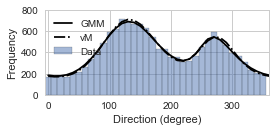

In [77]:
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, density_dir_expected*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', color='black', label='vM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, density_dir_expected[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

In [78]:
phi = phi_from_speed_dir(df.speed, df.dir, speed_params, dir_params)
phi_data = [cos(phi), sin(phi)]
n_vM_phi = N_VM_PHI

In [79]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [80]:
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

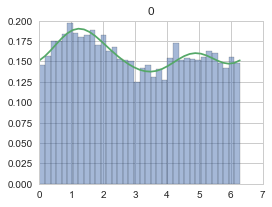

In [81]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x, connection_params)
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

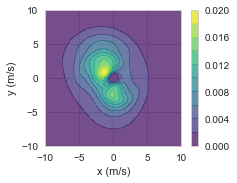

In [82]:
al_pdf = generate_al_pdf_from(speed_params, dir_params, connection_params, cartesian=True)

X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [np.arctan2(y, x) for x,y in coords]
al_pdf_result = al_pdf(x, alpha)
al_Z = al_pdf_result.reshape(XX.shape)

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [83]:
with np.errstate(divide='ignore'): # papermill has bugs
    display(gof_df(al_pdf_result, kde_result, BIN_WIDTH))

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0    0.527  0.187        inf          inf  0.000004      0.161       0.870

In [84]:
speed_params, dir_params, connection_params

((0.22727218319573933,
  0.48089925744158374,
  2.935757984755976,
  2.918616871899931),
 [[1.1244828412786136, 2.7531607312899857, 0.26639540786326443],
  [3.9780667921653676, -1.5094240692405514, 0.19646989062582898],
  [0.85257748003835809, -0.64222764622033712, 0.17329496193675817],
  [1.9516371674057746, 2.1902721746316947, 0.36383973957414839]],
 [[0.92449419756667561, -1.3758360929771627, 0.33293329149681944],
  [0.6208536210322062, 2.6698103951102943, 0.2908075436977211],
  [0.96857516745041772, 1.0840811112277766, 0.37625916480545946]])

In [85]:
# Empirical Power
if 'gofs_mean_set' in globals():
    display(gofs_mean_set)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.016605  0.993412      0.907984
(1997, 2002)  0.011990  0.995680      0.927815
(1991, 1996)  0.012304  0.994883      0.938097

In [86]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANkAAAC3CAYAAACfQPtcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlcVFX/x98zA8OwDLLKooALgoigggu4oWZqpuW+oKhp
i/5MzdLU6tFKK58ye8weUzMz7UlTM/ctFbFcWQRUBFkEARXZ921m7u8PcooAUXQQ6L5fL18v5t5z
7v1+7/Vzz7nnfM/3SgRBEBAREdEZ0qdtgIhIU0cUmYiIjhFFJiKiY0SRiYjoGFFkIiI6RhSZiIiO
eWoii4iIICAgoMr2U6dOMXr0aMaPH8/OnTsB0Gg0LF26lPHjxxMQEEBSUlJ9mysiUmf0nsZJv/nm
G/bv34+hoWGl7eXl5XzyySfs3r0bQ0NDJk6cyIABAwgLC6OsrIyffvqJ8PBwVq5cyddff/00TBcR
eWSeSkvm6OjI2rVrq2yPj4/H0dGRZs2aIZfL8fb2Jjg4mNDQUPr06QNA586duXr1an2bLCJSZ55K
SzZ48GBSUlKqbC8oKECpVGp/GxsbU1BQQEFBASYmJtrtMpkMlUqFnl7N5oeGhj5Zo0VEHgJvb+8q
256KyGrCxMSEwsJC7e/CwkKUSmWV7RqN5oECu091DoeGhla7vanxT/CzqKScH/efJ7PEkPAb6RQU
lwMglUrYsnQQ5koFOfmlfLzlEgZyGQb6MvRkUqRSCVKJhOd7tcattQUAe4PiKClTY6TQw1ihj5FC
HyOFHtbmhthbVTzg1WoNUqkEiURSrT01PdgblMjatm1LUlISOTk5GBkZERISwowZM5BIJAQGBjJ0
6FDCw8NxcXF52qY+Niq1BpVag0LeoG5Bg+RyzD0CQ5PJyishJ7+UL9/qj1Qq4XZ6IfsuZgPZWJsb
0quTPd7tm+PpbI2xoT4AZkoDPp3Tp9ZzjPBzrrWMTFa3t6sGcYcPHDhAUVER48ePZ/HixcyYMQNB
EBg9ejQ2NjY8++yznD17lgkTJiAIAh9//PHTNvmxuBKfwaofQpg0xI1BPZwAWPl9MDkFpZgay7G1
NMbJVomjrRKH5koUBg3iNj0VTgbf4sufLqP5I4xdaSSnoLj8j+tkxGCvZrw40JuWzU1qbGGeNk/t
7rVs2VI7RD98+HDt9gEDBjBgwIBKZaVSKR9++GG92qcLBEHgl9NxfH/4OgDWZn+OrqamF5B0N4+/
r4no792SN/0run2ZucWYGhugr/fPmN7c/1s83+y9iomhPkumdaO9kwVyfZl2v4mRHN/2ShxslA84
ytPnH/OIzMwt5uDvN3G1rvhfrFJreGn5cdRqDSq1gIFchpWZIdZmhgzs5kh3d1sA0rOLMTHSx/AB
rUm5Ss2djEIKistxbmlW6T/CfQqLy1nz02XOX7mDhamCRVO60qG1pXb/2gX9UWsE8gvLSE0v4Nbd
PG7dza9U5sufwklIzeXZHo4M9mmFjYXRk7o8DQ5BELh+MwtzpQHLX+uJk53p0zapzjR5kWXnlbD7
VCxHzidSrtIwvLs5Pt1BJpVgrNBDJpOiJ5VSXKoi8XYecck5eDpbaet//mMo1xIysTBV0LK5CS2s
TbA2N6S1fTO6utn8USaMsxG3AZDry/B0tsK7fXO829tgZ2VMWlYR/9pwjjsZhXg6W7FgsjfmSkUV
W2VSCWZKA8yUBri3say0TxAEWtmZEpucza6Tsew+FYt3exsG9XDCo60lJkZy3V3Ep4BEIuFNf2+y
80tobt64HyZNWmSbD1zj0NmblJWraW5uyPhnXTGTpgMVN3H94oGVyms0ArmFpejr/dkSdWxjib6e
lNT0AiLjMoiMywCgb+cWWpF5uTbHWKGPgVxG+I10Qq6nEXI9DbdWqXw6pw/mSgOMDfUZ3d+ZgOfc
6vQCLZFIeGm4O/5D2vN7eCpHziVqzzN3XGee/ePd7lTILcyVCkrKNHW6Zk+TkjIV3+y9ilsrCwZ2
d0RfT9roBQZNXGS/nI7DqpmCcc92ZGC3ipsWGppRY3mpVFKlhZn8nJv275IyFXcyCrmXVYStlbF2
+6AeTtoBDIB72UWERt/D9I/WRa4v49PXe1cSb10x0JfxTDdHnunmSFxKDheu3sG9bUWrp9YIrPs5
ktIyNTIpXEgIZbCPE+5tLBvkoEB0YhYh0Wkk3ckj6U4+d7MKEQRIupNH/64OyKQNz+a60KRF9tpI
Dwb1cKr2HakuKOR6tLZvRmv7Zg8s19zciOd8W1Xa9iQE9necW5rh3NJM+1sQBN7y9yY2OZtTl25y
OiyF02EptLA24fWxnejY1uoBR6sf1GqNtiW/fCOdn369AYDSSB/3Npa4OJgz/lmXJiMwaOIiG9a7
zdM2oV7Rk0nx9bDD18OODs2LUJi34tiFJM5F3sbc9M8WOr+oDGU9v8OVlKrYfSqWc1du85/5/ZDr
y/Dr0gJXJ3Na2ZlirjRokK3tk6BJi+yfjEQioWNbKzq2tWLWaE+MFBWTs1fiMvjw2wuM6t+OkX5t
dT4HJwgCQWEpbDkURWZuCRamCm5nFNLKzhR7axPsrU1qP0gjRxTZP4D7AgMoLClHIdfjx2PRHLuQ
yJShbvTzckD6t+6ZIAioNQJ6dYxyEASBHcdjuHD1Lgm3c9HXkzJ+oAujB7R74HRIU+Sf5a0IPh3t
8HS2YvepWPYGxfPF9svsCYxj2jB37WjpR99dJOR6GhqNgKezNX27tMDXw67GaYKiknJu3MrmakIm
nZyt8XC2QiKREBKdRuKdXHp52jNtWAdsLY2rrd/UEUX2D8RIoc+UoR0Y4tOKrYevE3Q5hejELK3I
LEwVtG1hhkqjITw2nfDYdNb9HMnIfm2ZMrRDRRfwcirXb2YSnZhN4p1cbdhTXmEZHn/MM86f6IW5
UqGNI/ynIorsH0xzCyMWTPZm+gvuyP8SqjVrdCft33czC/ktPJUzl1Ox+GPwRCKRsON4DKnpBcj1
pLi1tsStlQVurS1w/0uESsvmDTvcqb4QRSaiFU912FoaM/YZF8Y+44JG82dg5asjPTAx1Ke1fbN/
TCxlXRFFJvLQ/HVwxMu1+VO0pHEhPoJERHSMKDIRER0jikxERMeIIhMR0TGiyEREdIwoMhERHVPv
Iqst5fbevXsZPnw4/v7+7Nq1C4CysjLeeustxo0bx/Tp00lMTKxvs0VE6ky9z5OdOHGixpTbWVlZ
fPnll+zZswdTU1OmTZuGr68vp0+fxsjIiJ07d5KQkMDy5cv59ttv69t0EZE6Ue8ie1DK7ZSUFFxd
XTEzq1iI6OHhQUREBHFxcfTt2xeANm3aEB8fX99mi4jUmXoX2YNSbjs5OREXF0dGRgbGxsacP3+e
Vq1a4ebmRmBgIAMHDiQiIoK0tDTUajUy2YNXG9eU0fWfksJb9LNhUO8ie1DK7WbNmrFkyRLmzJmD
mZkZ7u7umJub069fP+Lj4/H398fLywt3d/daBQZimm7Rz/qlJrHX+8CHl5cXZ86cAaiSclulUhEV
FcWPP/7ImjVrSEhIwMvLiytXruDr68v27dsZMmQIDg4O9W22iEidqfeWrLqU239N0w0wcuRIDAwM
eOmll7CwqPggwJo1a1i/fj1KpZKPPvqovs0WEakz9S6y6lJut23bVvv366+/zuuvv15pv4WFBVu2
bKkP80REnjjiZLSIiI4RRSYiomNEkYmI6BhRZCIiOkYUmYiIjhFFJiKiY0SRiYjoGFFkIiI6RhSZ
iIiOEUUmIqJjRJGJiOgYUWQiIjpGFJmIiI4RRSYiomNEkYmI6BhRZCIiOkYUmYiIjhFFJiKiY0SR
1RPJycnMnTuXcePGMWXKFF599VViY2MBWLt2LW5ubqSlpWnLZ2Zm4u7uzp49e7T5KDdu3FjpmDNn
ziQgIKBe/Xh

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.030483      0.030162  0.962171      0.951092   

              r_square_weibulll  
year_lim                         
(1991, 1996)           0.959729

Wall time: 23.9 s
Parser   : 153 ms


## 6.4 Sectoral Comaprison

In [87]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

(6.7477001590674517, 9.9856395363105672e-05, 917.00519624367234, 6.6930344943421973, 0.89551927039809043, 0.9008887297352336)
Wall time: 11.8 s


In [88]:
al_params = [speed_params, dir_params, connection_params]

In [89]:
# %%time
# incre = max(SECTOR_LENGTH, 10)
# al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
#                                         for angle in arange(0, 360, incre))  
# print(true_R_square(al_density_collection, len(df)))

In [90]:
# %%time
# true_R_square_mean_set=[]
# for year_length in [10]:
#     start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
# #     start_year, end_year = 2005, 2015-year_length+1
#     df_standard = df_all_years[str(2015-year_length+1):str(2015)]
#     true_R_square_set = []
#     for sub_start_year in arange(start_year, end_year+1):
#         df_previous =  df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
#         emp_density_collection=Parallel(n_jobs=-1)(delayed(emp_direction_compare)(df_previous, df_standard, angle, incre) 
#                                             for angle in arange(0, 360, incre))  
#         true_R_square_set.append(true_R_square(emp_density_collection, len(df)))
#     true_R_square_set=pd.DataFrame(true_R_square_set, index=arange(start_year, end_year+1))
#     year_lim = end_year-year_length-5, end_year-year_length
#     true_R_square_mean = true_R_square_set.query('index >= @year_lim[0] & index <= @year_lim[1]').mean()
#     true_R_square_mean['year_lim']=year_lim
#     true_R_square_mean_set.append(true_R_square_mean)
#     plot(true_R_square_set[5], label=year_length)
#     display(pd.DataFrame(true_R_square_mean_set).set_index('year_lim'))

In [91]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
gmm_vals=Parallel(n_jobs=-1)(delayed(gmm_weibull_empirical_direction)(gmm, df, angle, rebinned_angle, BIN_WIDTH) 
                                for angle in arange(0, 360, rebinned_angle))  

Wall time: 14.1 s


In [92]:
# %%time
# y_als=Parallel(n_jobs=-1)(delayed(al_direction)(al_params, df, angle, rebinned_angle, BIN_WIDTH) 
#                                     for angle in arange(0, 360, rebinned_angle))  

In [93]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = 0, 360
    curve_collection = []
    max_speed = df['speed'].max()
#     max_speed = ceil(df['speed'].quantile(.999))

    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre, bin_width)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        sub_df, bins, start_radian, end_radian, data_size = sub_df_at_angle(df, angle, incre, bin_width)
        x = bins
        
        # 1. Fit Weibull, Empirical and GMM PDF, CDF
        gmm_val = [element for element in gmm_vals if element['angle'] == angle][0]
        density, y_ecdf = gmm_val['density'], gmm_val['y_ecdf']
        density_expected_gmm, y_cdf_gmm, direction_prob = gmm_val['density_expected_gmm'], gmm_val['y_cdf_gmm'], gmm_val['direction_prob']
        y_weibull, density_expected_weibull, y_cdf_weibull = gmm_val['y_weibull'], gmm_val['density_expected_weibull'], gmm_val['y_cdf_weibull']
        
        # 3. R square for GMM, Weibull
        R_square_gmm = sector_r_square(density, density_expected_gmm)                
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        
        # Makeup for Angular-Linear
        if 'y_als' in globals():
            al = [element for element in y_als if element['angle'] == angle][0]
            y_al, y_cdf_al = al['y_al'], al['y_cdf_al']
            R_square_al = sector_r_square(density, y_al)
            k_s_al =  np.abs(y_ecdf - y_cdf_al).max()
        else:
            R_square_al = None
            k_s_al = None
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=bins, alpha=0.5, label='Data')                  
        plot(bins[:-1]+BIN_WIDTH/2, density_expected_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        if 'y_als' in globals():
            ax1.plot(bins[:-1]+BIN_WIDTH/2, y_al*data_size*bin_width,'-.', color='black', label='AL')
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        if 'y_als' in globals():
            ax2.plot(x, y_cdf_al,'-.', color='black', label='AL')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size,  
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(),  'max_cdf_diff_al': k_s_al, 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull, 'r_square_al': R_square_al}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s degree' % (angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull, R_square_al)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

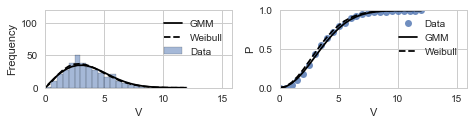

0 degree
data size: 340 weight 0.023274917853231106
GMM Weibull
R square 0.921483138606 0.944366534872 None
max diff: 0.0461814391964 0.0627934355597 speed value: 3.5 2.0 y gmm 0.506759737274
 


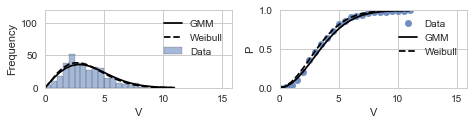

20 degree
data size: 355 weight 0.024301752464403067
GMM Weibull
R square 0.874202786929 0.903559586262 None
max diff: 0.0623349473944 0.0634080819482 speed value: 5.0 1.5 y gmm 0.763017165282
 


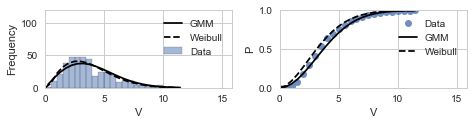

40 degree
data size: 398 weight 0.027245345016429355
GMM Weibull
R square 0.853433714321 0.907968346235 None
max diff: 0.0947234880384 0.0933183883407 speed value: 4.0 1.5 y gmm 0.553517717992
 


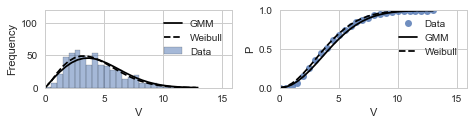

60 degree
data size: 537 weight 0.036760679079956185
GMM Weibull
R square 0.873354166732 0.914482865642 None
max diff: 0.0659919996727 0.053539463689 speed value: 3.5 1.5 y gmm 0.382797572022
 


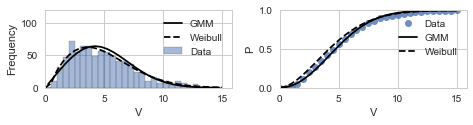

80 degree
data size: 811 weight 0.05551752464403067
GMM Weibull
R square 0.910542232231 0.95395795241 None
max diff: 0.0441316759207 0.060376040947 speed value: 4.0 2.0 y gmm 0.384968200775
 


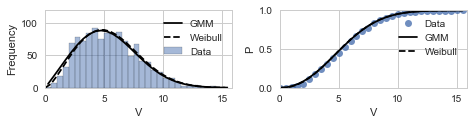

100 degree
data size: 1168 weight 0.07995618838992333
GMM Weibull
R square 0.956593777134 0.96223083851 None
max diff: 0.0332132922768 0.0281546715092 speed value: 2.0 2.0 y gmm 0.0845831552905
 


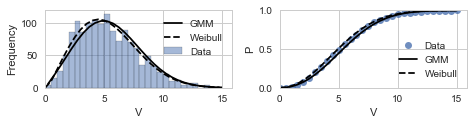

120 degree
data size: 1389 weight 0.09508488499452356
GMM Weibull
R square 0.932196211772 0.95967275778 None
max diff: 0.0492841099249 0.0283079758152 speed value: 5.5 2.0 y gmm 0.521630216929
 


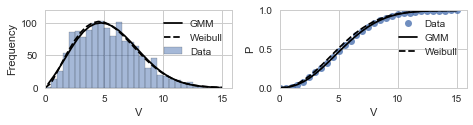

140 degree
data size: 1338 weight 0.09159364731653888
GMM Weibull
R square 0.954879774253 0.959736537431 None
max diff: 0.0199988641791 0.0459726150555 speed value: 3.0 6.0 y gmm 0.180300089483
 


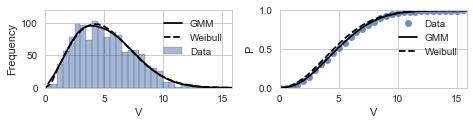

160 degree
data size: 1245 weight 0.08522727272727272
GMM Weibull
R square 0.960433355958 0.957463822771 None
max diff: 0.0179904296867 0.0556426188649 speed value: 7.5 5.5 y gmm 0.826022558201
 


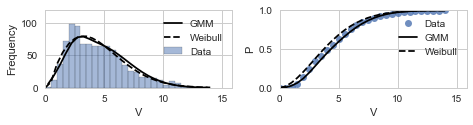

180 degree
data size: 926 weight 0.06338992332968237
GMM Weibull
R square 0.912634156657 0.9258683334 None
max diff: 0.0621168420983 0.0757086647739 speed value: 3.0 1.5 y gmm 0.2812956849
 


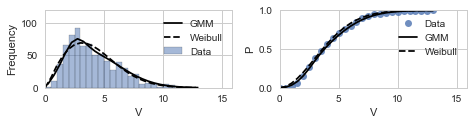

200 degree
data size: 740 weight 0.05065717415115006
GMM Weibull
R square 0.947617673986 0.910179735747 None
max diff: 0.0365168171929 0.0550654269437 speed value: 3.0 1.5 y gmm 0.354023723348
 


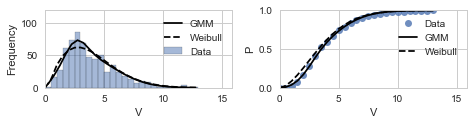

220 degree
data size: 647 weight 0.0442907995618839
GMM Weibull
R square 0.95099578761 0.902831446642 None
max diff: 0.0265244398094 0.0936325357418 speed value: 3.5 1.5 y gmm 0.497432283529
 


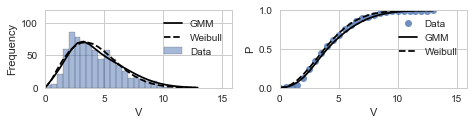

240 degree
data size: 737 weight 0.050451807228915665
GMM Weibull
R square 0.918793362037 0.913128226068 None
max diff: 0.0454028670139 0.058638784024 speed value: 6.0 1.5 y gmm 0.770065246962
 


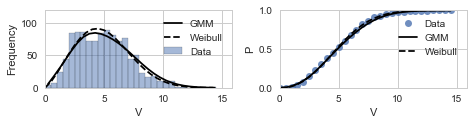

260 degree
data size: 1076 weight 0.07365826944140197
GMM Weibull
R square 0.927837451392 0.933416781502 None
max diff: 0.0392740829215 0.0290487736685 speed value: 7.0 3.5 y gmm 0.782287255369
 


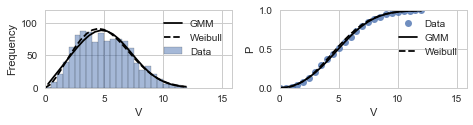

280 degree
data size: 1058 weight 0.07242606790799562
GMM Weibull
R square 0.929048049199 0.941359524682 None
max diff: 0.0297896505786 0.0367960411811 speed value: 4.0 6.0 y gmm 0.341665925981
 


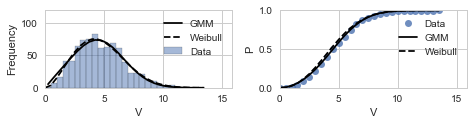

300 degree
data size: 804 weight 0.055038335158817085
GMM Weibull
R square 0.956975683128 0.967897213152 None
max diff: 0.0301585202093 0.0442575321026 speed value: 2.5 5.5 y gmm 0.165730659513
 


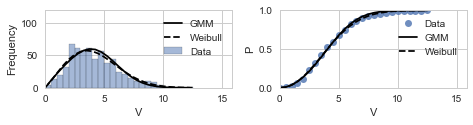

320 degree
data size: 612 weight 0.041894852135815994
GMM Weibull
R square 0.901175359284 0.920493266773 None
max diff: 0.030874114048 0.0300077510382 speed value: 8.0 2.0 y gmm 0.970416597708
 


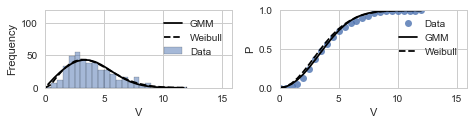

340 degree
data size: 427 weight 0.029230558598028478
GMM Weibull
R square 0.882254094882 0.911114008764 None
max diff: 0.0544649913016 0.0806028125358 speed value: 1.5 2.0 y gmm 0.10364531917
 
Wall time: 8.44 s


In [94]:
%%time
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

[0.9292142689089855, 0.9392034628672759]


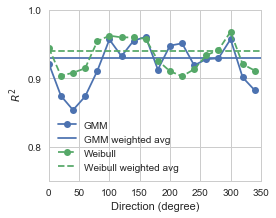

In [95]:
diff_df = pd.DataFrame(curve_collection) 

vals = [{'name': 'GMM', 'value': diff_df.r_square_gmm},
        {'name': 'Weibull', 'value': diff_df.r_square_weibull}]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.r_square_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(means)

[0.039601967764398234, 0.050308764890237445]


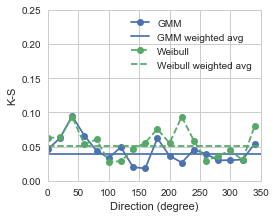

In [96]:
vals = [{'name': 'GMM', 'value': diff_df.max_cdf_diff_gmm},
        {'name': 'Weibull', 'value': diff_df.max_cdf_diff_weibull},]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.max_cdf_diff_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(means)

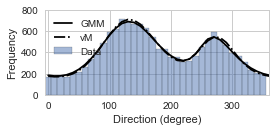

In [97]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [98]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [99]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [100]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [101]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
print(bandwidth, FIT_METHOD)

config = create_gmm_config(bandwidth, FITTING_RANGE, FIT_LIMIT, BIN_WIDTH, KDE_KERNEL, FIT_METHOD)

0.8 square_error


## 7.1  Result Variability

In [102]:
# %%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

number of estimated clusters : 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBD1C18>]], dtype=object)

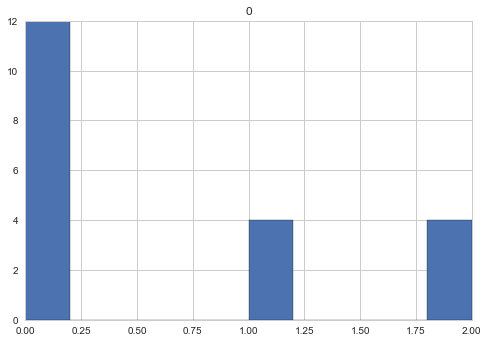

In [103]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected
ms_bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)

labels, cluster_centers = ms.labels_, ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)
pd.DataFrame(ms.labels_).hist()

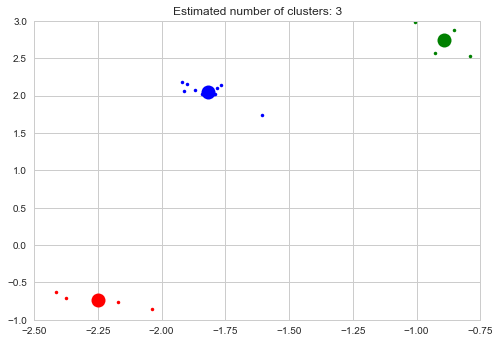

In [104]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.699  -1.793   2.015  3.224  3.342  -0.001
2  0.256   1.116  -3.722  2.464  2.743   0.307
3  0.045  -1.808  -1.553  1.253  1.706  -0.632

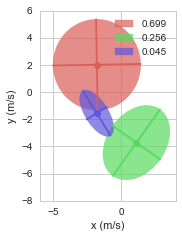

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.988  0.012      0.075     9695.201  1.047513e-07      0.027       0.138

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.012      0.089    27445.714  9.666220e-08      0.025       0.133

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.710  -1.765   2.144  3.291  3.388  -0.040
2  0.239   0.929  -4.043  2.486  2.664   0.318
3  0.051  -1.692  -1.537  1.214  1.607  -0.590

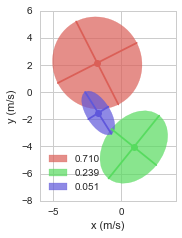

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.987  0.011      0.100    15090.137  1.136947e-07      0.027       0.144

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.012      0.086    19013.044  9.801358e-08      0.025       0.134

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.701  -1.782   2.106  3.252  3.344  -0.026
2  0.253   0.901  -3.963  2.446  2.752   0.297
3  0.046  -1.954  -1.032  1.079  1.733  -0.506

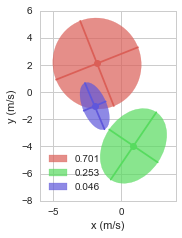

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.009      0.131   101129.288  9.624736e-08      0.024       0.133

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.088    23447.502  9.141128e-08      0.024       0.129

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.694  -1.790   2.015  3.293  3.356  -0.019
2  0.250   1.060  -3.882  2.435  2.759   0.307
3  0.055  -1.782  -1.380  1.150  1.704  -0.498

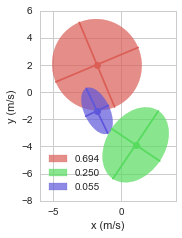

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.989  0.009      0.092    33990.699  1.005814e-07      0.024       0.135

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.081    20279.908  9.192748e-08      0.024       0.129

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.676  -1.920   2.175  3.197  3.316   0.004
2  0.272   1.001  -3.808  2.549  2.834   0.336
3  0.052  -1.844  -1.112  1.081  1.831  -0.521

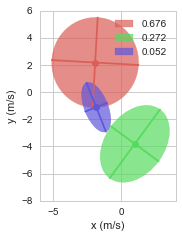

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.991  0.008      0.096    74426.327  8.186638e-08      0.022       0.122

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.012      0.084    29004.261  9.159929e-08      0.024       0.129


Cluster Number: 1


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.488  -0.929   2.573  2.696  3.369  -0.120
2  0.346  -2.527  -0.909  3.309  3.927  -0.632
3  0.166   1.648  -3.330  2.605  2.902   0.542

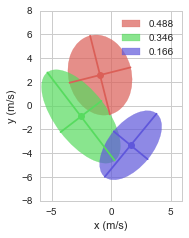

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.984  0.009      0.285   284102.287  1.398575e-07      0.030       0.160

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.215   136390.963  1.510862e-07      0.031       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.450  -1.005   2.978  2.806  3.130  -0.182
2  0.389  -2.065  -1.223  3.327  3.646  -0.628
3  0.160   1.424  -3.261  2.826  3.100   0.564

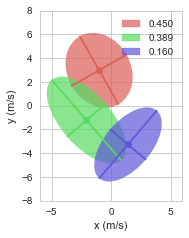

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.981  0.011      0.224    56782.265  1.644861e-07      0.032       0.173

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.178    34441.279  1.496177e-07      0.031       0.165

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.481  -0.791   2.536  2.742  3.373  -0.145
2  0.368  -2.408  -0.973  3.289  3.903  -0.614
3  0.150   1.671  -3.587  2.623  2.854   0.462

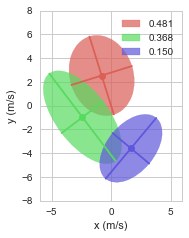

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.984  0.011      0.191   105490.145  1.403550e-07      0.030       0.160

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.014      0.183   100660.305  1.547204e-07      0.031       0.168

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.463  -0.853   2.884  2.833  3.164  -0.206
2  0.401  -2.044  -1.318  3.231  3.554  -0.604
3  0.136   1.460  -3.538  2.713  3.176   0.649

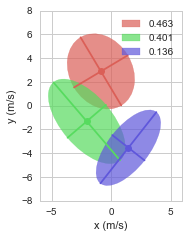

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.010      0.284   381346.710  1.606775e-07      0.033       0.171

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.274   323320.122  1.504067e-07      0.031       0.166


Cluster Number: 2


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.495  -2.039  -0.860  3.176  3.492  -0.542
2  0.362  -0.748   3.473  2.693  2.984  -0.224
3  0.143   1.649  -3.218  2.722  3.391   0.655

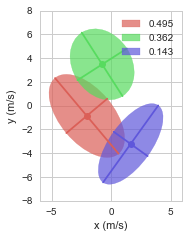

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.268   181181.615  1.862015e-07      0.033       0.184

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.010      0.238   244310.786  1.517420e-07      0.031       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.419  -2.414  -0.629  3.105  3.835  -0.599
2  0.393  -0.828   2.988  2.623  3.238  -0.117
3  0.188   1.773  -2.844  2.563  3.181   0.489

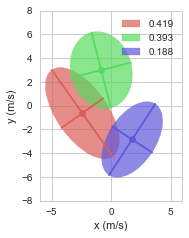

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.011      0.243   170651.786  1.584190e-07      0.031       0.170

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.014      0.312   374257.997  1.520333e-07      0.031       0.167

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.454  -2.169  -0.756  3.076  3.616  -0.548
2  0.389  -0.755   3.117  2.835  3.088  -0.144
3  0.158   1.711  -3.353  2.740  3.206   0.583

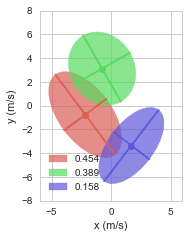

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.011      0.284   159697.926  1.447699e-07      0.030       0.163

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.011      0.216   122817.961  1.508356e-07      0.031       0.166

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.430  -2.373  -0.714  3.170  3.908  -0.616
2  0.400  -0.731   2.899  2.625  3.240  -0.126
3  0.170   1.727  -3.150  2.675  2.979   0.486

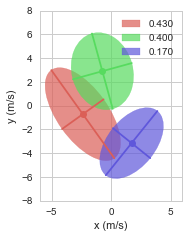

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.013      0.267   114067.105  1.507282e-07      0.030       0.166

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.983  0.012      0.241   128010.114  1.521802e-07      0.031       0.167

In [105]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [106]:
%%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 5
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 11686.4 2921.6
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.134055   1362.715952  0.018691  3.678415e-07    0.046874     0.258943   
1    0.140069   2089.716843  0.020368  3.772893e-07    0.048836     0.262346   
2    0.135059   1482.278553  0.019018  3.594580e-07    0.047031     0.256117   
3    0.132843   1303.109981  0.021105  3.631501e-07    0.049614     0.257439   
4    0.137966   1801.680306  0.020289  3.579570e-07    0.046898     0.255426   

   R_square  
0  0.958584  
1  0.956770  
2  0.959295  
3  0.958087  
4  0.959252

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.233361   6889.583521  0.026956  4.953714e-07    0.061352     0.300938   
1    0.173525   1106.749253  0.013664  3.373635e-07    0.044829     0.247974   
2    0.221619   5659.722437  0.025970  4.783999e-07    0.056804     0.295084   
3    0.204215   4249.079018  0.024512  4.284091e-07    0.044880     0.279196   
4    0.204341   4654.216322  0.027908  4.695541e-07    0.055316     0.293057   

   R_square  
0  0.941390  
1  0.962708  
2  0.944483  
3  0.954021  
4  0.946707

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.075583   1981.920758  0.013304  1.898774e-07    0.035142     0.186029   
1    0.071852   1815.656007  0.013564  1.800897e-07    0.034393     0.181246   
2    0.070620   1693.586769  0.013074  1.838186e-07    0.034209     0.183131   
3    0.086523   3161.756965  0.014913  1.938955e-07    0.034130     0.188113   
4    0.093736   4249.730661  0.015661  2.033187e-07    0.034673     0.192542   

   R_square  
0  0.978073  
1  0.979276  
2  0.979143  
3  0.978163  
4  0.977024

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.115280   3853.684008  0.015971  2.588395e-07    0.037496     0.217595   
1    0.195229   7064.168252  0.032164  4.036819e-07    0.044834     0.271285   
2    0.148352   8085.326275  0.017716  2.721935e-07    0.040021     0.222679   
3    0.135247   1477.198347  0.029060  2.677225e-07    0.043981     0.220702   
4    0.149256   3816.821732  0.013754  2.647852e-07    0.041086     0.219892   

   R_square  
0  0.972174  
1  0.956434  
2  0.968639  
3  0.968284  
4  0.969178

  
Number of gaussian 3
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.207815  91786.944607  0.010160  1.389767e-07    0.030107     0.159030   
1    0.085515  31668.964557  0.011187  8.232957e-08    0.022632     0.122672   
2    0.092160  35545.137739  0.010769  8.913608e-08    0.023697     0.127604   
3    0.080448  26977.522774  0.009186  7.671728e-08    0.021704     0.118253   
4    0.071747  12047.687109  0.008905  9.955977e-08    0.024683     0.134700   

   R_square  
0  0.984052  
1  0.990618  
2  0.989870  
3  0.991276  
4  0.988696

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.366870  99714.953743  0.031242  2.970300e-07    0.039739     0.233817   
1    0.146442   4945.176828  0.036910  2.282119e-07    0.038351     0.203144   
2    0.123737  13376.673338  0.016012  1.338134e-07    0.028316     0.155744   
3    0.163989   5949.448312  0.017066  2.092020e-07    0.035344     0.195578   
4    0.212354  87788.150501  0.014432  1.373808e-07    0.030138     0.158551   

   R_square  
0  0.967433  
1  0.974303  
2  0.984677  
3  0.976153  
4  0.984277

  
Number of gaussian 4
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.081726  48202.126148  0.007625  5.870936e-08    0.019312     0.103561   
1    0.076001  27659.498099  0.006308  4.760992e-08    0.017140     0.093235   
2    0.095848  88458.053605  0.005303  4.868773e-08    0.017508     0.094143   
3    0.074790  11235.669544  0.006911  4.546077e-08    0.016843     0.091013   
4    0.092566  49204.400737  0.006565  4.621860e-08    0.016920     0.091829   

   R_square  
0  0.993293  
1  0.994591  
2  0.994448  
3  0.994828  
4  0.994731

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.192788   30333.062075  0.018732  1.151346e-07    0.025504     0.144460   
1    0.106628   13863.294512  0.009970  1.188185e-07    0.027992     0.146901   
2    0.203452   40272.836926  0.025832  1.443511e-07    0.029727     0.162894   
3    0.342010  636760.906319  0.011070  1.286080e-07    0.028079     0.153465   
4    0.094204    2862.741942  0.016718  1.530882e-07    0.031564     0.166989   

   R_square  
0  0.987138  
1  0.986382  
2  0.983742  
3  0.985340  
4  0.982739

  
Number of gaussian 5
Train


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.158121  120937.301635  0.010725  3.635099e-08    0.014918     0.081346   
1    0.060743    5842.846377  0.006270  3.537851e-08    0.014970     0.080400   
2    0.203350  215441.556289  0.008728  3.543018e-08    0.014883     0.080370   
3    0.047341    8490.969213  0.006447  2.961959e-08    0.013645     0.073536   
4    0.045009    9801.455066  0.006530  2.689241e-08    0.013054     0.070023   

   R_square  
0  0.995841  
1  0.995952  
2  0.995983  
3  0.996627  
4  0.996946

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.285520  124190.323804  0.023068  1.395940e-07    0.029332     0.160187   
1    0.147836   14238.667217  0.008170  9.984440e-08    0.024477     0.134472   
2    0.290439  107598.108588  0.017283  1.452692e-07    0.030302     0.162916   
3    0.137424   44054.671806  0.020989  1.272217e-07    0.028047     0.152038   
4    0.111645    2864.224256  0.014363  1.252177e-07    0.027325     0.151229   

   R_square  
0  0.984484  
1  0.988863  
2  0.983271  
3  0.985599  
4  0.985656

Wall time: 1min 43s


In [107]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    0.135999   1607.900327  0.019894  3.651392e-07    0.047851     0.258054   
2    0.079663   2580.530232  0.014103  1.902000e-07    0.034509     0.186212   
3    0.107537  39605.251357  0.010042  9.734388e-08    0.024565     0.132452   
4    0.084186  44951.949627  0.006542  4.933728e-08    0.017545     0.094756   
5    0.102913  72102.825716  0.007740  3.273434e-08    0.014294     0.077135   

   R_square  
1  0.958398  
2  0.978336  
3  0.988902  
4  0.994378  
5  0.996270

Test gof mean, std


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    0.207412    4511.870110  0.023802  4.418196e-07    0.052636     0.283250   
2    0.148673    4859.439723  0.021733  2.934445e-07    0.041484     0.230431   
3    0.202678   42354.880544  0.023132  2.011276e-07    0.034378     0.189367   
4    0.187816  144818.568355  0.016464  1.320001e-07    0.028573     0.154942   
5    0.194573   58589.199134  0.016775  1.274294e-07    0.027897     0.152168   

   R_square  
1  0.949862  
2  0.966942  
3  0.977369  
4  0.985068  
5  0.985575

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


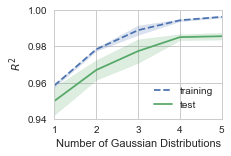

K_S


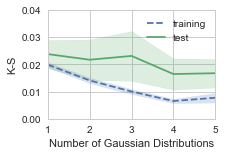

Chi_square


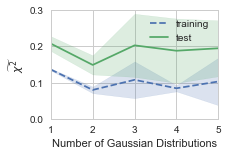

MSE


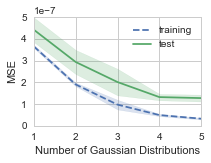

In [108]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [109]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)

In [110]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

48.75N98.25W
